This data comes from the <b>Ames Housing Dataset</b>- a collection of residential sales data in Ames, Iowa between 2006 and 2010. The dataset was created as an alternative to the Boston Housing Data, encompassing more variables and requiring a need to do feature engineering and could be a perfect dataset for regression model comparision. It is also an ongoing Kaggle competition that you can find here https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation
<br>


This project uses <b>Root Mean Squared Error (RMSE) </b> as the evaluation metric. 
And this is the formula:
<br>
$$RMSE = \sqrt{{\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}}}$$
<br>
where,</center>
<br>
$$n \text{ = population size}$$
$$\hat{y}_i \text{ = predicted y value}$$
$$y_i \text{ = actual y value}$$
$$\Sigma \text{ = sum}$$
<br>
<center>RMSE measures the average distance between the actual values in the data and the predicted values from the model. The distance between the actual and predicted points are what is known as the <b>residuals</b>. So in other words, RMSE indicates the standard deviation of the residuals. It essentially tells us how concentrated the data is around the regression line.</center>
<br>


###  Data Exploration Analysis Scope

1. <b> Understand the Variables</b>  Examine the variables and their descriptions.
2. <b> Variable Study</b>  Study both dependent and independent variables
3. <b> Transform Data and Handle Missing Data.</b>  Clean the data and handle the missing data, outliers and format the categorical varibles
4. <b> Linear Regression Assumption Test</b> QC and Transform the data if the dataset are not compliant with the requirement of Linear Regaression

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
%matplotlib inline

#### load the data

In [161]:
import os
CURR_DIR = os.getcwd()
df_train = pd.read_csv(CURR_DIR+"\\HW5\\train.csv")
df_test = pd.read_csv(CURR_DIR+"\\HW5\\test.csv")
df_all=pd.concat([df_train.assign(category='train'),df_test.assign(category='test')])

In [162]:
df_test = pd.read_csv(CURR_DIR+"\\HW5\\test.csv")

###  1. Understand the Problem

#### Variable Grouping and Explanation

**SalePrice** - the property's sale price in dollars.  
This is the target variable that you're trying to predict.  


**Areas**  
1stFlrSF: First Floor square feet  
2ndFlrSF: Second floor square feet  
GrLivArea: Above grade (ground) living area square feet  
TotalBsmtSF: Total square feet of basement area  
MasVnrArea: Masonry veneer area in square feet  
GarageArea: Size of garage in square feet  

LowQualFinSF: Low quality finished square feet (all floors)  
BsmtFinSF1: Type 1 finished square feet  
BsmtFinSF2: Type 2 finished square feet  
BsmtUnfSF: Unfinished square feet of basement area  

WoodDeckSF: Wood deck area in square feet  
OpenPorchSF: Open porch area in square feet  
EnclosedPorch: Enclosed porch area in square feet  
3SsnPorch: Three season porch area in square feet  
ScreenPorch: Screen porch area in square feet  
PoolArea: Pool area in square feet  
  
  
**Class, Condition, Quality**  
OverallQual: Overall material and finish quality  
OverallCond: Overall condition rating  
MSSubClass: The building class  
MSZoning: The general zoning classification  
Neighborhood: Physical locations within Ames city limits  
BldgType: Type of dwelling  
HouseStyle: Style of dwelling   
Foundation: Type of foundation  
Functional: Home functionality rating  

RoofStyle: Type of roof  
RoofMatl: Roof material  
Exterior1st: Exterior covering on house  
Exterior2nd: Exterior covering on house (if more than one material)  
MasVnrType: Masonry veneer type  
  
KitchenQual: Kitchen quality  
ExterQual: Exterior material quality  
ExterCond: Present condition of the material on the exterior  
FireplaceQu: Fireplace quality  
  
PoolQC: Pool quality  
Fence: Fence quality 

Utilities: Type of utilities available  
Heating: Type of heating  
HeatingQC: Heating quality and condition  
CentralAir: Central air conditioning  
Electrical: Electrical system  


**Rooms, numbers**  
FullBath: Full bathrooms above grade  
HalfBath: Half baths above grade  
Bedroom: Number of bedrooms above basement level  
Kitchen: Number of kitchens  
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  

Fireplaces: Number of fireplaces  


**Lot, Street, Alley**  
LotFrontage: Linear feet of street connected to property  
LotArea: Lot size in square feet  
Street: Type of road access  
Alley: Type of alley access  
LotShape: General shape of property  
LandContour: Flatness of the property  
LotConfig: Lot configuration  
LandSlope: Slope of property  
Condition1: Proximity to main road or railroad  
Condition2: Proximity to main road or railroad (if a second is present)  
PavedDrive: Paved driveway 


**BASEMENT**  
BsmtQual: Height of the basement  
BsmtCond: General condition of the basement  
BsmtExposure: Walkout or garden level basement walls  
BsmtFinType1: Quality of basement finished area  
BsmtFullBath: Basement full bathrooms  
BsmtHalfBath: Basement half bathrooms  


**Garage**  
GarageType: Garage location  
GarageYrBlt: Year garage was built  
GarageFinish: Interior finish of the garage  
GarageCars: Size of garage in car capacity    
GarageQual: Garage quality  
GarageCond: Garage condition  

**Years**  
YearBuilt: Original construction date  
YearRemodAdd: Remodel date  
MoSold: Month Sold  
YrSold: Year Sold  

 
MiscFeature: Miscellaneous feature not covered in other categories  
MiscVal: $Value of miscellaneous feature  

SaleType: Type of sale  
SaleCondition: Condition of sale 

### 2. Study the Variables

#### list all variables and their data type as well as investigating the variable meanings.

In [163]:
print ("Train has {} rows and {} columns".format(df_train.shape[0],df_train.shape[1]))
print ("Test has {} rows and {} columns".format(df_test.shape[0],df_test.shape[1]))
print(df_train.head().info())
print(df_train.describe().T)
print('_'*50)
print(df_test.head().info())
print(df_test.describe().T)

Train has 1460 rows and 81 columns
Test has 1459 rows and 80 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5 non-null      int64  
 1   MSSubClass     5 non-null      int64  
 2   MSZoning       5 non-null      object 
 3   LotFrontage    5 non-null      float64
 4   LotArea        5 non-null      int64  
 5   Street         5 non-null      object 
 6   Alley          0 non-null      object 
 7   LotShape       5 non-null      object 
 8   LandContour    5 non-null      object 
 9   Utilities      5 non-null      object 
 10  LotConfig      5 non-null      object 
 11  LandSlope      5 non-null      object 
 12  Neighborhood   5 non-null      object 
 13  Condition1     5 non-null      object 
 14  Condition2     5 non-null      object 
 15  BldgType       5 non-null      object 
 16  HouseStyle     5 non-null      ob

#### Check the dependent variables

In [164]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### 3. Transform Data and Handle Missing Data

In [165]:

print("Skewness: {}".format(df_train['SalePrice'].skew()))  #is the degree of distortion from the symmetrical bell curve or the normal curve.
print("Kurtosis: {}".format(df_train['SalePrice'].kurt()))   # Kurtosis is the measure of the "tailedness" of the probability
print("There is {} missing data in SalePrice".format(df_train['SalePrice'].isnull().sum())) ## check if there is missing value. luckily, no missing value in Sale Price.

### the saleprice is skewed and not in normal distribution. and it is necessary to make transformation to make it in normal distribution

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529
There is 0 missing data in SalePrice


#### the saleprice is right-skewed  and not in normal distribution, and it is necessary to transform the data to make it in normal distribution

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

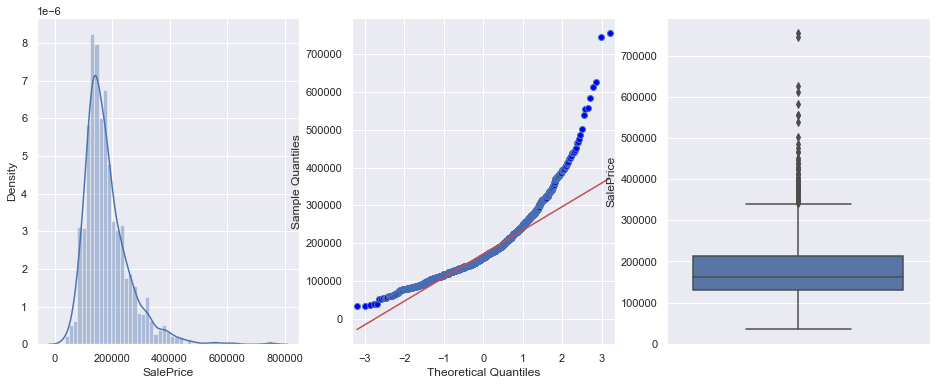

In [166]:
#create histogram, boxplot , Q-Q plot to check the data normality 
fig,ax=plt.subplots(1,3,figsize=(16,6))
fig = sm.qqplot(df_train['SalePrice'],line='q',ax=ax[1])
sns.boxplot(y="SalePrice",data=df_train,ax=ax[2])
sns.distplot(df_train['SalePrice'],ax=ax[0])

#### log transform the data to make it in normal distribution

Log transformed Skewness: 0.12134661989685333
Log transformed Kurtosis: 0.809519155707878
There is 0 missing data in SalePrice


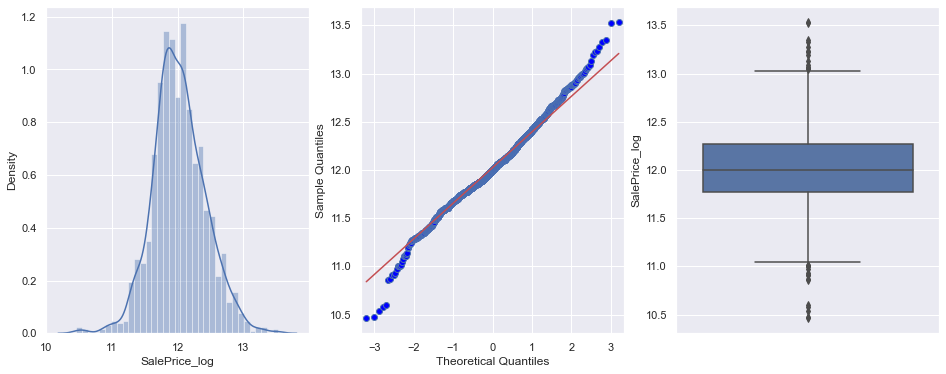

In [167]:


df_train['SalePrice_log'] = np.log1p(df_train['SalePrice'])

#create histogram, boxplot , Q-Q plot to check the data normality 
fig,ax=plt.subplots(1,3,figsize=(16,6))
fig = sm.qqplot(df_train['SalePrice_log'],line='q',ax=ax[1])
sns.boxplot(y="SalePrice_log",data=df_train,ax=ax[2])
sns.distplot(df_train['SalePrice_log'],ax=ax[0])
print("Log transformed Skewness: {}".format(df_train['SalePrice_log'].skew()))  #is the degree of distortion from the symmetrical bell curve or the normal curve.
print("Log transformed Kurtosis: {}".format(df_train['SalePrice_log'].kurt()))   # Kurtosis is the measure of the "tailedness" of the probability
print("There is {} missing data in SalePrice".format(df_train['SalePrice_log'].isnull().sum())) ## check if there is missing value. luckily, no missing value in Sale Price.


##### check the number of independent variables are quantitative or qualitative 



In [622]:
quant_variables=[v for v in df_train.columns if df_train.dtypes[v]!='object']
quant_variables.remove('SalePrice')  ## remove the dependent variable.
quant_variables.remove('SalePrice_log') 
quant_variables.remove('Id')  # id is not a useful feature and removed
quali_variables = [f for f in df_train.columns if df_train.dtypes[f] == 'object']
print("there are "+str(len(quant_variables))+" quantitative independent variables")
print("there are "+str(len(quali_variables))+" qualitative independent variables")

there are 36 quantitative independent variables
there are 43 qualitative independent variables


#### Handle the missing data in both train and test data for independent variables

In [623]:
total = df_all.isnull().sum().sort_values(ascending=False)
percent = (df_all.isnull().sum()/df_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageYrBlt,159,0.054471
GarageQual,159,0.054471


##### There are a lot of NaN entries in some columns, for example, PoolQC, NaN means no pool, same for Fence,FireplaceQu,etc, I simply need to fill None to those variables.

In [624]:
###columns where NaN values means e.g. no pool, no fence etc.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    df_train[col].fillna('None',inplace=True)
    df_test[col].fillna('None',inplace=True)

In [168]:
## update the df_all
df_all=pd.concat([df_train.assign(category='train'),df_test.assign(category='test')])

In [173]:
#### check missing again. The saleprice is not missing data, but there is sale price in df_test dataset.

total = df_all.isnull().sum().sort_values(ascending=False)
percent = (df_all.isnull().sum()/df_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice_log,1459,0.499829
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageCond,159,0.054471


In [174]:
# fillna with mean value for other columns: 
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)


#### check if there is still missing data

In [175]:
df_train.isnull().sum().sum()  # no missing data

6617

In [172]:
df_test.isnull().sum().sum() # no missing data

6670

#### Check the Skewness and Kurtosis in training data's quantative variables.

Regarding normality, Linear Regression models assume that the residuals (difference of predicted and observed values) will be normally distributed and have constant variance. But no assumption about the distribution of the independent variables (features, predictors) or dependent variables (target, response) is made.
But: While a linear model does not require target or feature values to be normally distributed, a transformation of the target or features (like log) may improve the quality of the fit. This is because it may reduce the effect of outliers. A strongly skewed feature will in general not have a linear relationship to the target (which is one of the assumptions for linear models).In this House Prices case,  log transform of the two features GrLivArea and LotArea is improving the results. For other skewed features, I did not find an improvement, although I did not check every feature (mainly those with high correlation to target).

In [630]:
df_train[quant_variables].kurt().sort_values(ascending=False)

MiscVal          701.003342
PoolArea         223.268499
LotArea          203.243271
3SsnPorch        123.662379
LowQualFinSF      83.234817
LotFrontage       21.848165
KitchenAbvGr      21.532404
BsmtFinSF2        20.113338
ScreenPorch       18.439068
BsmtHalfBath      16.396642
TotalBsmtSF       13.250483
BsmtFinSF1        11.118236
EnclosedPorch     10.430766
MasVnrArea        10.154316
OpenPorchSF        8.490336
1stFlrSF           5.745841
GrLivArea          4.895121
WoodDeckSF         2.992951
BedroomAbvGr       2.230875
MSSubClass         1.580188
OverallCond        1.106413
GarageArea         0.917067
TotRmsAbvGrd       0.880762
BsmtUnfSF          0.474994
GarageCars         0.220998
OverallQual        0.096293
Fireplaces        -0.217237
GarageYrBlt       -0.266503
MoSold            -0.404109
YearBuilt         -0.439552
2ndFlrSF          -0.553464
BsmtFullBath      -0.839098
FullBath          -0.857043
HalfBath          -1.076927
YrSold            -1.190601
YearRemodAdd      -1

In [631]:
df_train[quant_variables].skew().sort_values(ascending=False)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.676412
LotFrontage       2.384950
OpenPorchSF       2.364342
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt      -0.668175
dtype: float64

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

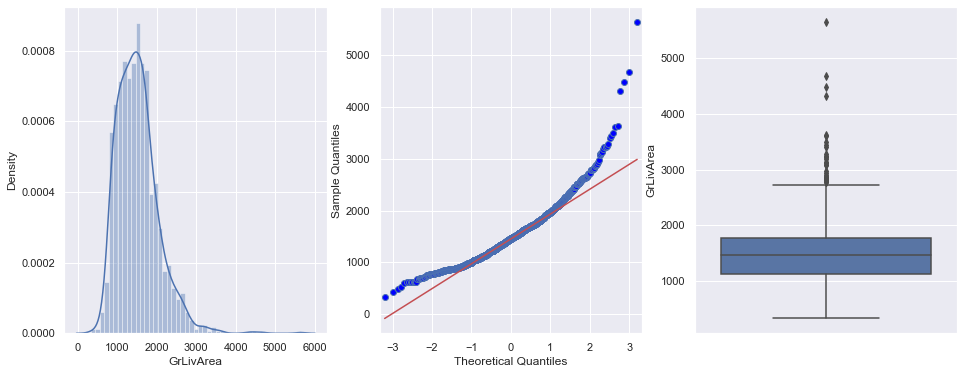

In [176]:
#create histogram, boxplot , Q-Q plot to check the data normality for GrLivArea
fig,ax=plt.subplots(1,3,figsize=(16,6))
fig = sm.qqplot(df_train['GrLivArea'],line='q',ax=ax[1])
sns.boxplot(y="GrLivArea",data=df_train,ax=ax[2])
sns.distplot(df_train['GrLivArea'],ax=ax[0])

<AxesSubplot:xlabel='GrLivArea_log', ylabel='Density'>

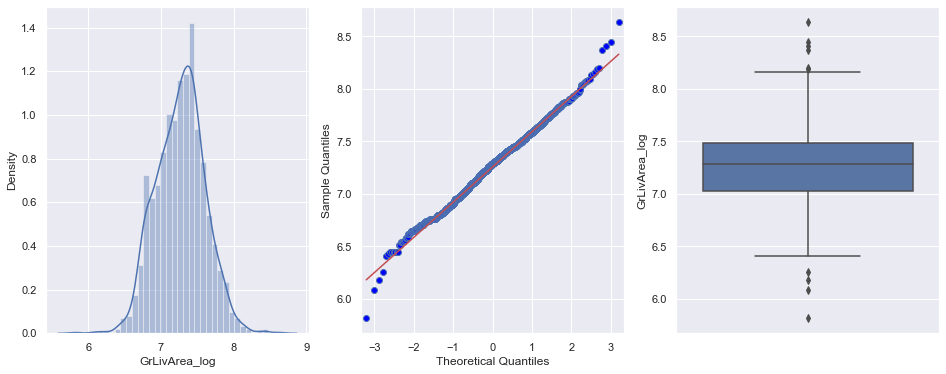

In [177]:
df_train['GrLivArea_log'] = np.log1p(df_train['GrLivArea'])

#create histogram, boxplot , Q-Q plot to check the data normality 
fig,ax=plt.subplots(1,3,figsize=(16,6))
fig = sm.qqplot(df_train['GrLivArea_log'],line='q',ax=ax[1])
sns.boxplot(y="GrLivArea_log",data=df_train,ax=ax[2])
sns.distplot(df_train['GrLivArea_log'],ax=ax[0])

<AxesSubplot:xlabel='LotArea_log', ylabel='Density'>

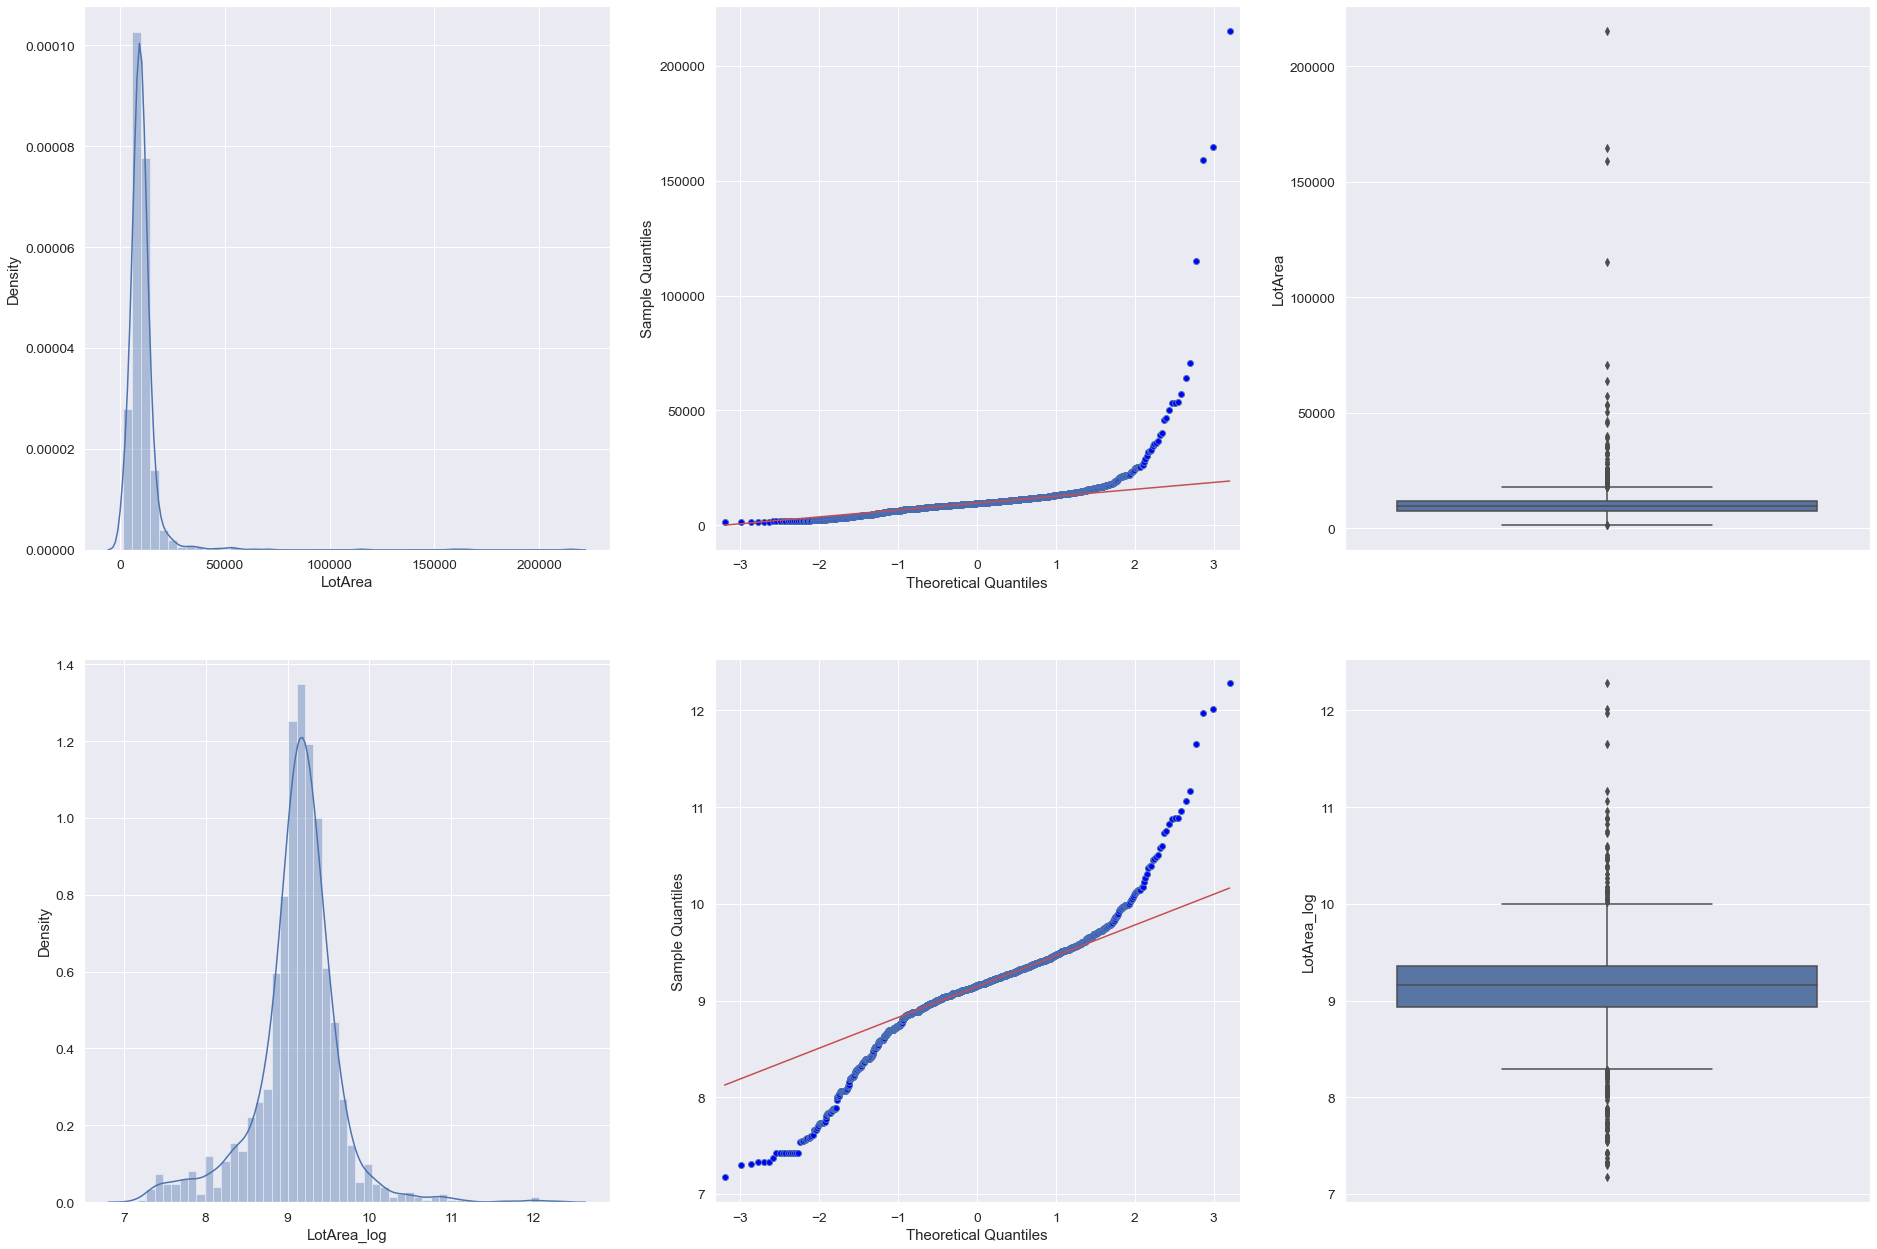

In [280]:
#create histogram, boxplot , Q-Q plot to check the data normality for LotArea
fig,ax=plt.subplots(2,3,figsize=(32,22))
fig = sm.qqplot(df_train['LotArea'],line='q',ax=ax[0,1])
sns.boxplot(y="LotArea",data=df_train,ax=ax[0,2])
sns.distplot(df_train['LotArea'],ax=ax[0,0])
df_train['LotArea_log'] = np.log1p(df_train['LotArea'])

fig = sm.qqplot(df_train['LotArea_log'],line='q',ax=ax[1,1])
sns.boxplot(y="LotArea_log",data=df_train,ax=ax[1,2])
sns.distplot(df_train['LotArea_log'],ax=ax[1,0])

#### check the correlations in the data and list the variables with correlation >0.4

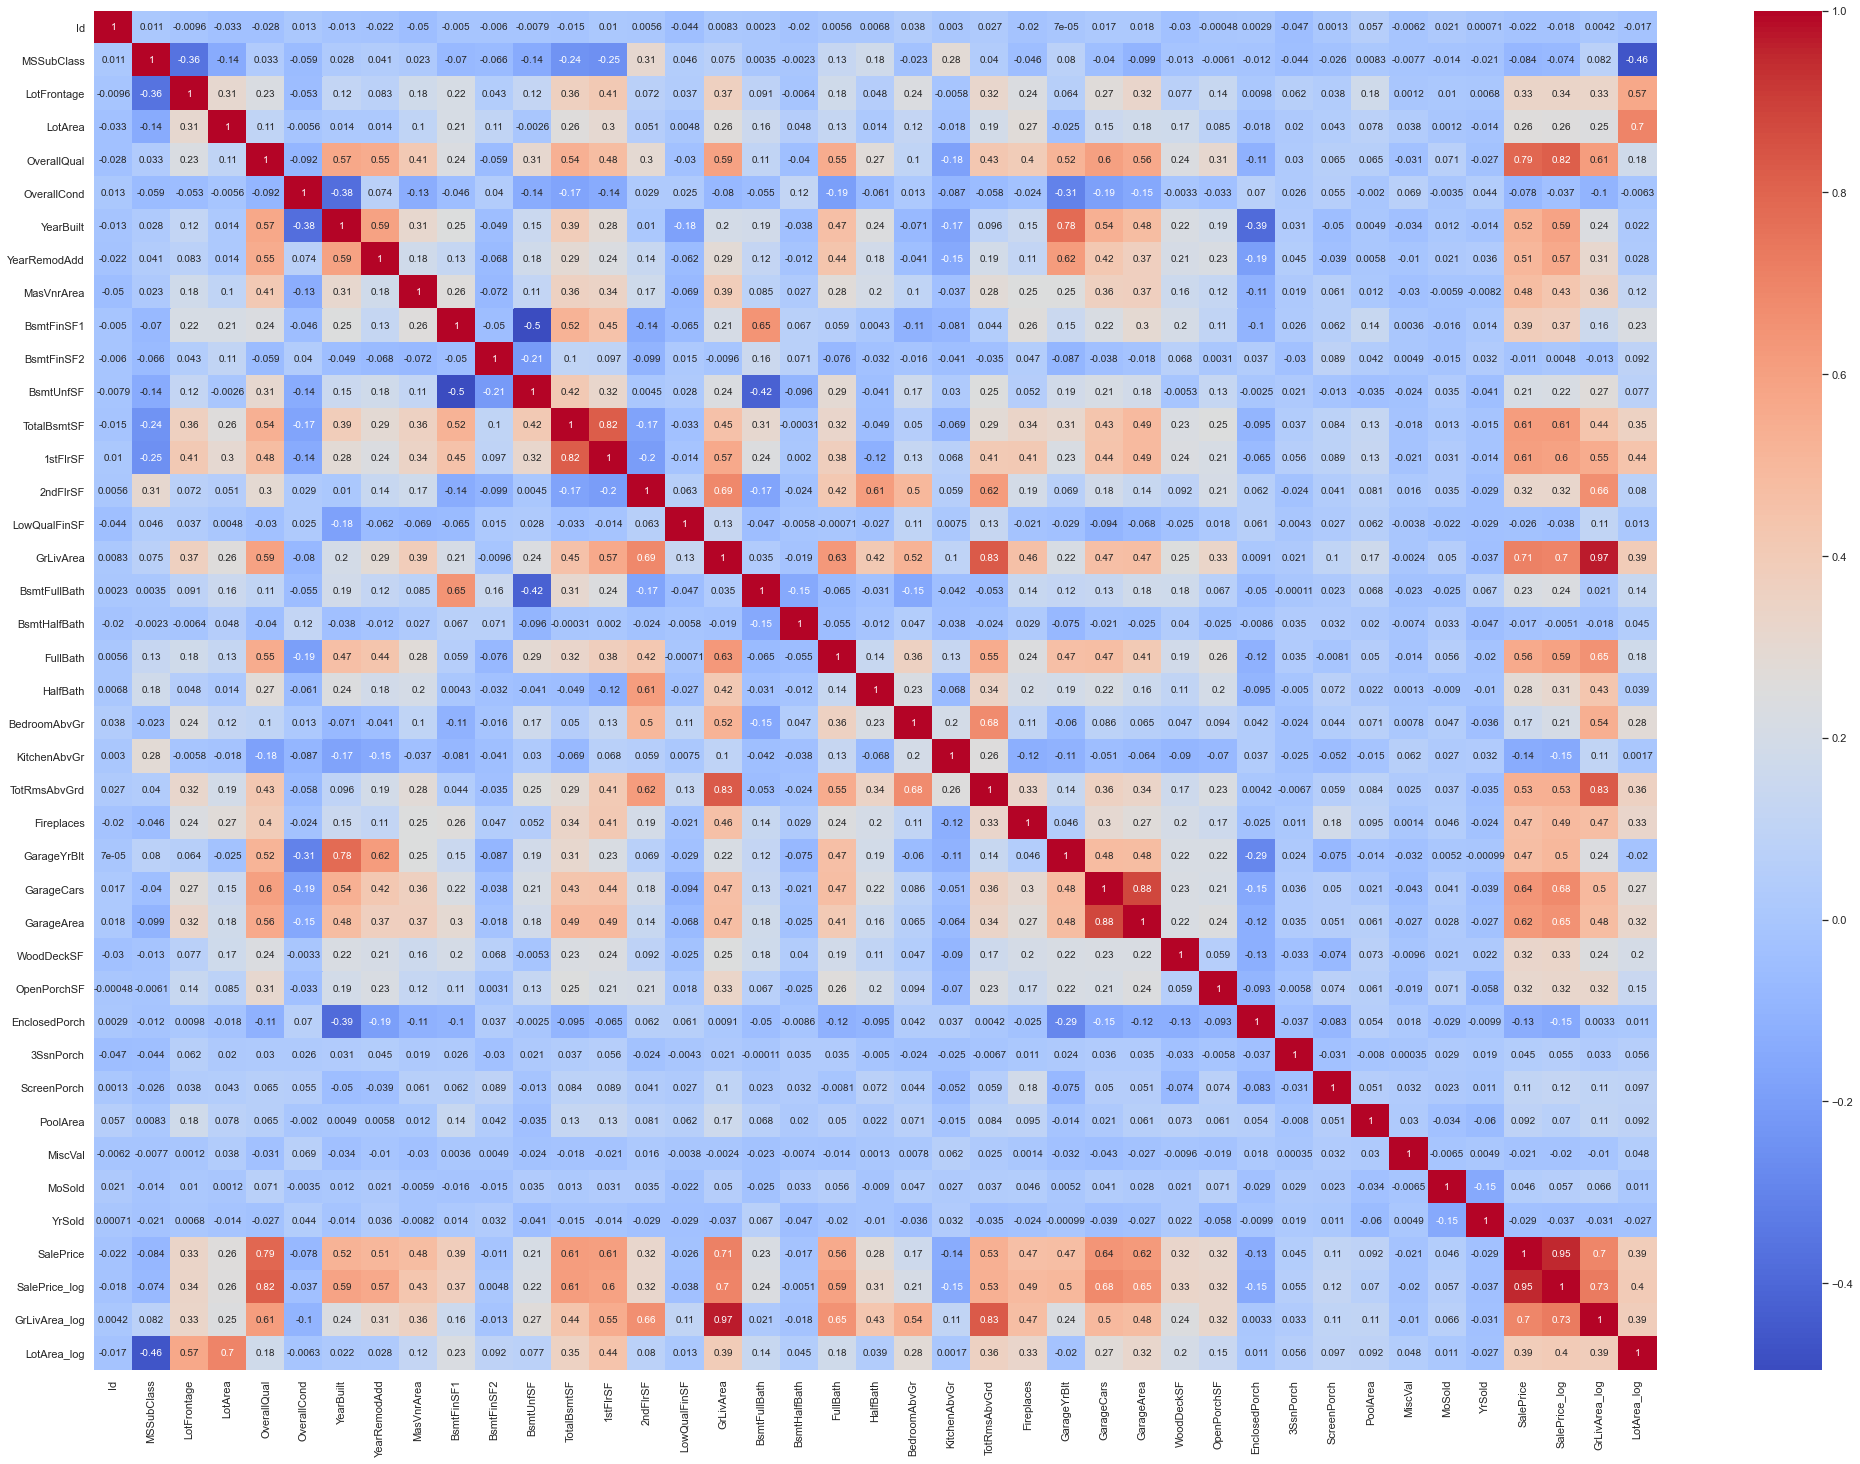

In [179]:
plt.figure(figsize=(35,25))
sns.heatmap(df_train.corr(),cmap='coolwarm',annot = True)
plt.show()

In [180]:
### list all the variables with correlation with SalePrice larger than 0.4. There are 13 variables.
corr = df_train.corr()
corr[corr['SalePrice_log']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'SalePrice_log', 'GrLivArea_log', 'LotArea_log'],
      dtype='object')

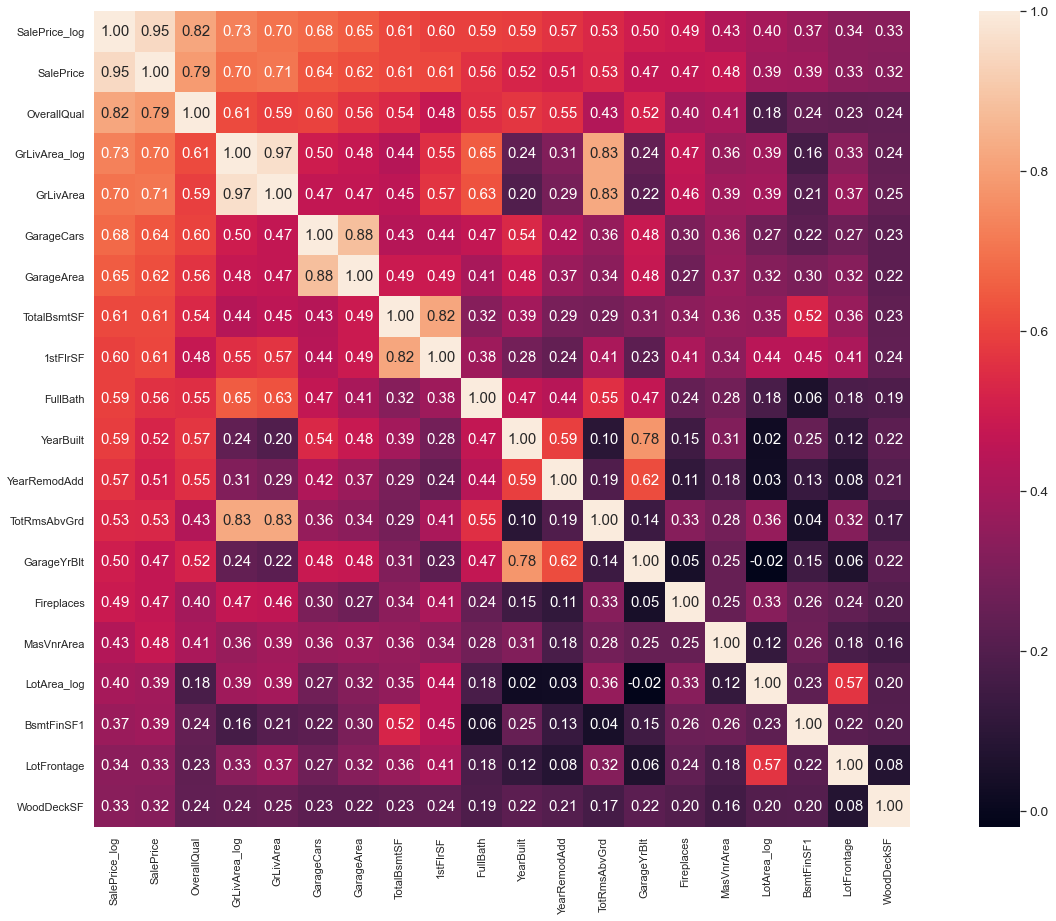

In [181]:
#saleprice correlation matrix with top 20
f, ax = plt.subplots(figsize=(25, 15))
k = 20 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice_log')['SalePrice_log'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


#### There are multicollinearity among parameters and those need to remove before modeling.

In [182]:
## top 15 correlated variables with saleprice
corr.nlargest(k, 'SalePrice_log')['SalePrice_log'].index

Index(['SalePrice_log', 'SalePrice', 'OverallQual', 'GrLivArea_log',
       'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt',
       'Fireplaces', 'MasVnrArea', 'LotArea_log', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF'],
      dtype='object')

In [183]:
(df_train.corr())["SalePrice_log"].sort_values(ascending = False)[1:]

SalePrice        0.948374
OverallQual      0.817185
GrLivArea_log    0.730254
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489450
MasVnrArea       0.429532
LotArea_log      0.399923
BsmtFinSF1       0.372023
LotFrontage      0.336156
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr

#### from the correlation analysis with rounded cutoff =0.4, we can see the following variables can be used as the features in the model:


<b>OverallQual</b>: Overall material and finish quality<br>
<b>GrLivArea</b>: Above grade (ground) living area square feet<br>
<b>GarageCars</b>: Size of garage in car capacity<br>
<b>GarageArea</b>: Size of garage in square feet<br>
<b>TotalBsmtSF</b>: Total square feet of basement area<br>
<b>1stFlrSF</b>: First Floor square feet<br>
<b>FullBath</b>: Full bathrooms above grade<br>
<b>YearBuilt</b>: Original construction date<br>
<b>YearRemodAdd</b>: Remodel date<br>
<b>TotRmsAbvGrd</b>: Total rooms above grade (does not include bathrooms)<br>
<b>GarageYrBlt</b>: Year garage was built<br>
<b>Fireplaces</b>: Number of fireplaces<br>
<b>MasVnrArea</b>: Masonry veneer area in square feet<br>
<b>LotArea  </b>       Lot size in square feet

#### There is noticeable strong correlation between GarageCars and GarageArea as they basically refer to the size of Garage. GarageCars is remained as it has higher correlation with SalePrice.
#### The follwing 13 variables are the final feature selected for the model and after reviewing their meaning, it is also making sense for ordinary people's house buying preference.


<b>OverallQual</b>: Overall material and finish quality<br>
<b>GrLivArea_log</b>: Above grade (ground) living area square feet<br>
<b>GarageCars</b>: Size of garage in car capacity<br>
<b>TotalBsmtSF</b>: Total square feet of basement area<br>
<b>1stFlrSF</b>: First Floor square feet<br>
<b>FullBath</b>: Full bathrooms above grade<br>
<b>YearBuilt</b>: Original construction date<br>
<b>YearRemodAdd</b>: Remodel date<br>
<b>TotRmsAbvGrd</b>: Total rooms above grade (does not include bathrooms)<br>
<b>GarageYrBlt</b>: Year garage was built<br>
<b>Fireplaces</b>: Number of fireplaces<br>
<b>MasVnrArea</b>: Masonry veneer area in square feet<br>
<b>LotArea_log</b>       Lot size in square feet

#scatterplot of the selected features and SalePrice_log
sns.set()
cols = ['SalePrice_log', 'OverallQual', 'GrLivArea_log', 'GarageCars', 'TotalBsmtSF','1stFlrSF' ,'FullBath', 'TotRmsAbvGrd',
        'YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','LotArea_log']
sns.pairplot(df_train[cols], size = 2)


In [184]:
cols = ['SalePrice_log', 'OverallQual', 'GrLivArea_log', 'GarageCars', 'TotalBsmtSF','1stFlrSF' ,'FullBath', 'TotRmsAbvGrd',
        'YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','LotArea_log']
df_train_m=df_train[cols]
#df_test_m=df_test[cols[1:]]

#### This is the correlation matrix plot for the selected quantative features with or without log transformation.

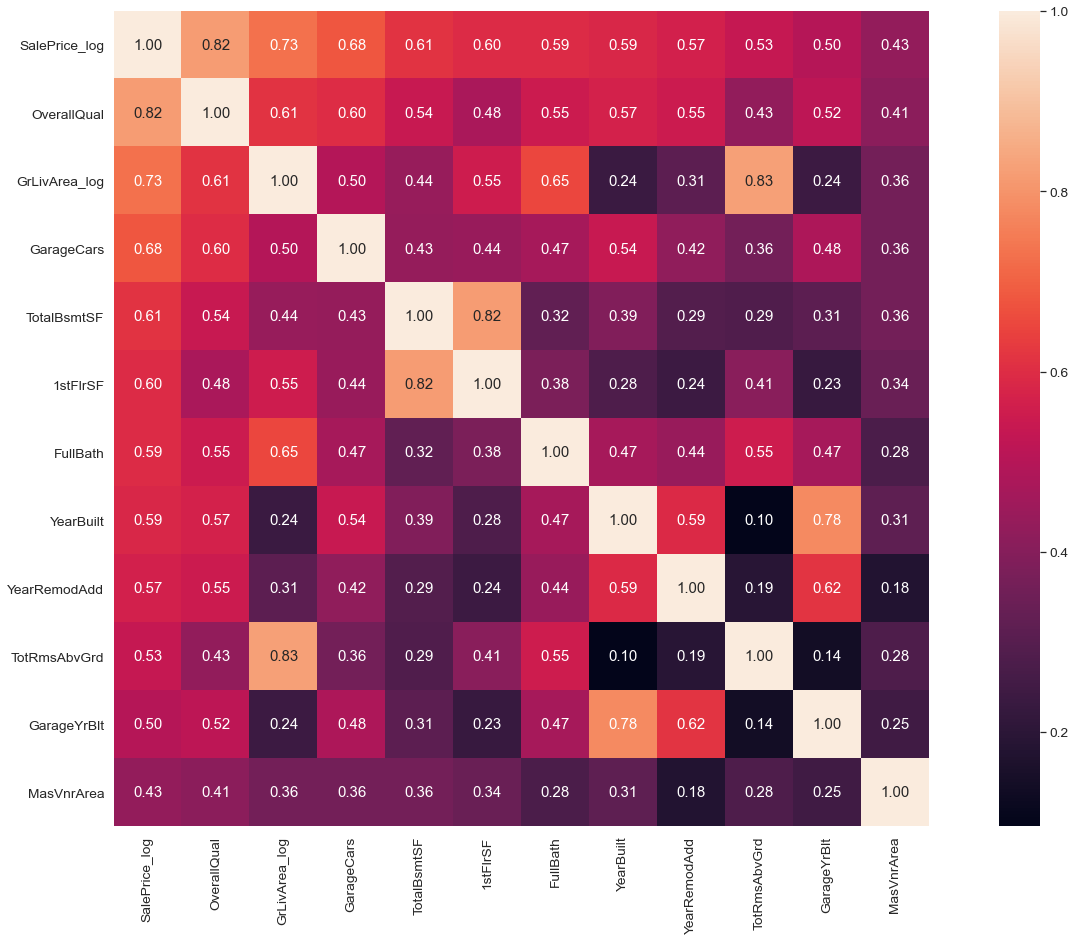

In [185]:
corr = df_train_m.corr()
f, ax = plt.subplots(figsize=(25, 15))
k = 12 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice_log')['SalePrice_log'].index
cm = np.corrcoef(df_train_m[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)


#### There is a need to remove the multicollinearity quantative variables. Such as TotRmsAbvGrd vs GrLivArea_log(0.83), and 1stFrSF vs TotalBsmtSF(0.82), GarageYrBlt vs YearBuilt(0.78)  I remove those with smaller correlation coefficients to SalePrice_log



In [186]:
cols = ['SalePrice_log', 'OverallQual', 'GrLivArea_log', 'GarageCars', 'TotalBsmtSF' ,'FullBath',
        'YearBuilt','YearRemodAdd','MasVnrArea','LotArea_log']
df_train_ml=df_train[cols]

In [187]:
df_train_ml

,SalePrice_log,OverallQual,GrLivArea_log,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,LotArea_log
0,12.247699,7,7.444833,2,856,2,2003,2003,196.0,9.042040
1,12.109016,6,7.141245,2,1262,2,1976,1976,0.0,9.169623
2,12.317171,7,7.488294,2,920,2,2001,2002,162.0,9.328212
3,11.849405,7,7.448916,3,756,1,1915,1970,0.0,9.164401
4,12.429220,8,7.695758,3,1145,2,2000,2000,350.0,9.565284
...,...,...,...,...,...,...,...,...,...,...
1455,12.072547,6,7.407318,2,953,2,1999,2000,0.0,8.976894
1456,12.254868,6,7.637234,2,1542,2,1978,1988,119.0,9.486152
1457,12.493133,7,7.758333,1,1152,2,1941,2006,0.0,9.109746
1458,11.864469,5,6.983790,1,1078,1,1950,1996,0.0,9.181735


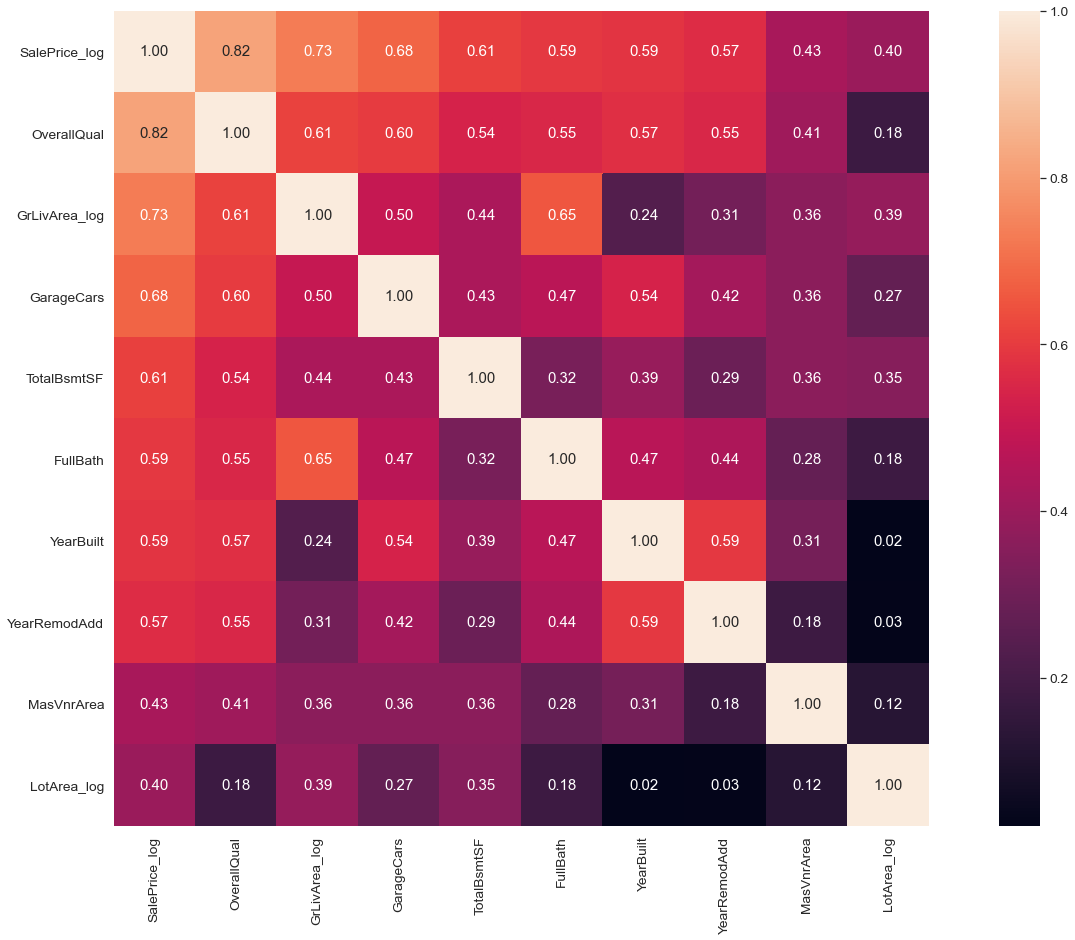

In [188]:
corr = df_train_ml.corr()
f, ax = plt.subplots(figsize=(25, 15))
k = 12 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice_log')['SalePrice_log'].index
cm = np.corrcoef(df_train_ml[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)


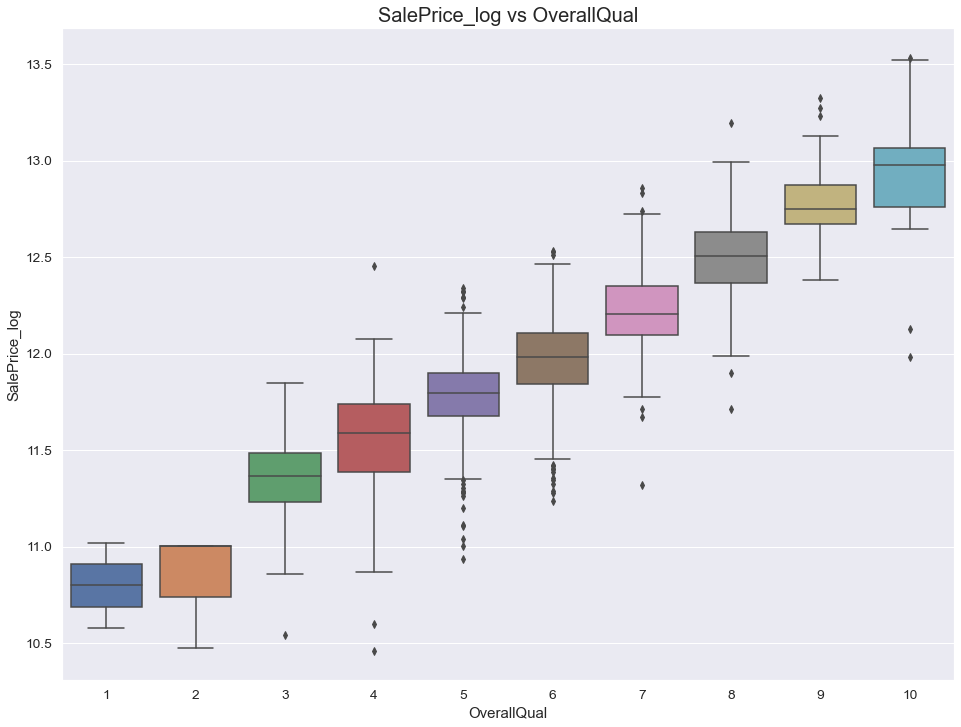

In [189]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train_ml['SalePrice_log'], df_train_ml['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(16, 12))
fig = sns.boxplot(x=var, y="SalePrice_log", data=data)
#fig.axis(ymin=0, ymax=800000)
plt.title("SalePrice_log vs OverallQual", fontsize = 20);

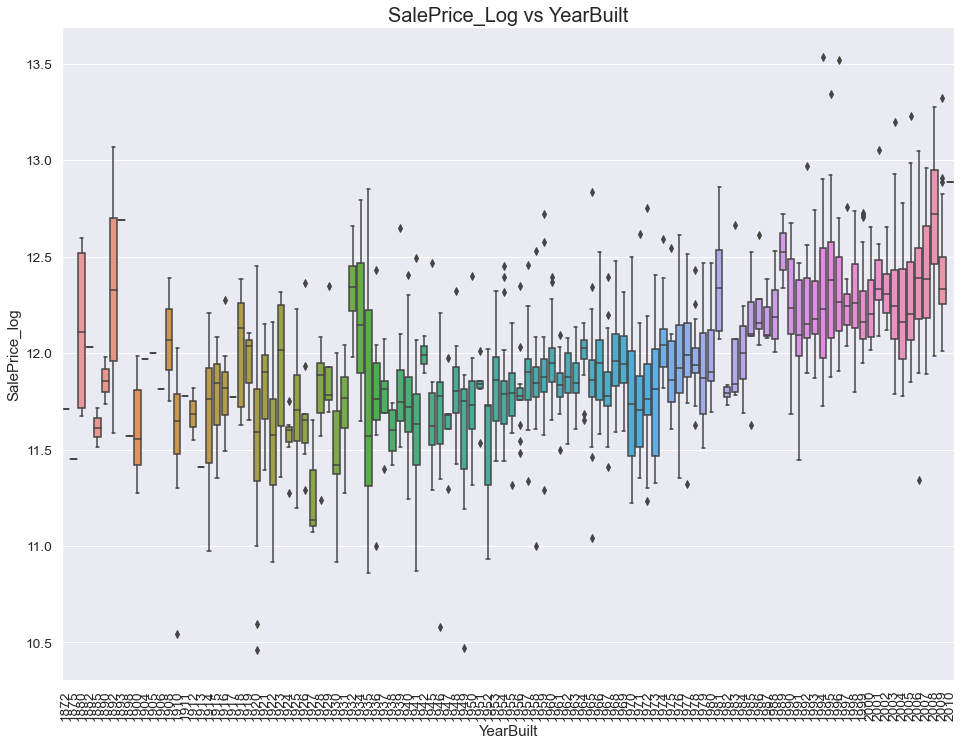

In [190]:
var='YearBuilt'
data = pd.concat([df_train_ml['SalePrice_log'], df_train_ml[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 12))
fig = sns.boxplot(x=var, y="SalePrice_log", data=data)
#fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.title("SalePrice_Log vs YearBuilt", fontsize = 20);

#### Now let us look at the qualitative features. Many qualitative features could impact the house price, such as neightborhood. 

In [191]:
## check how many qualitative features we have and what are they
for cat_feature in list(quali_variables) :
    print(df_train[cat_feature].value_counts())
    print('#'*20)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
####################
Pave    1454
Grvl       6
Name: Street, dtype: int64
####################
Grvl    50
Pave    41
Name: Alley, dtype: int64
####################
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
####################
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
####################
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
####################
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
####################
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
####################
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR  

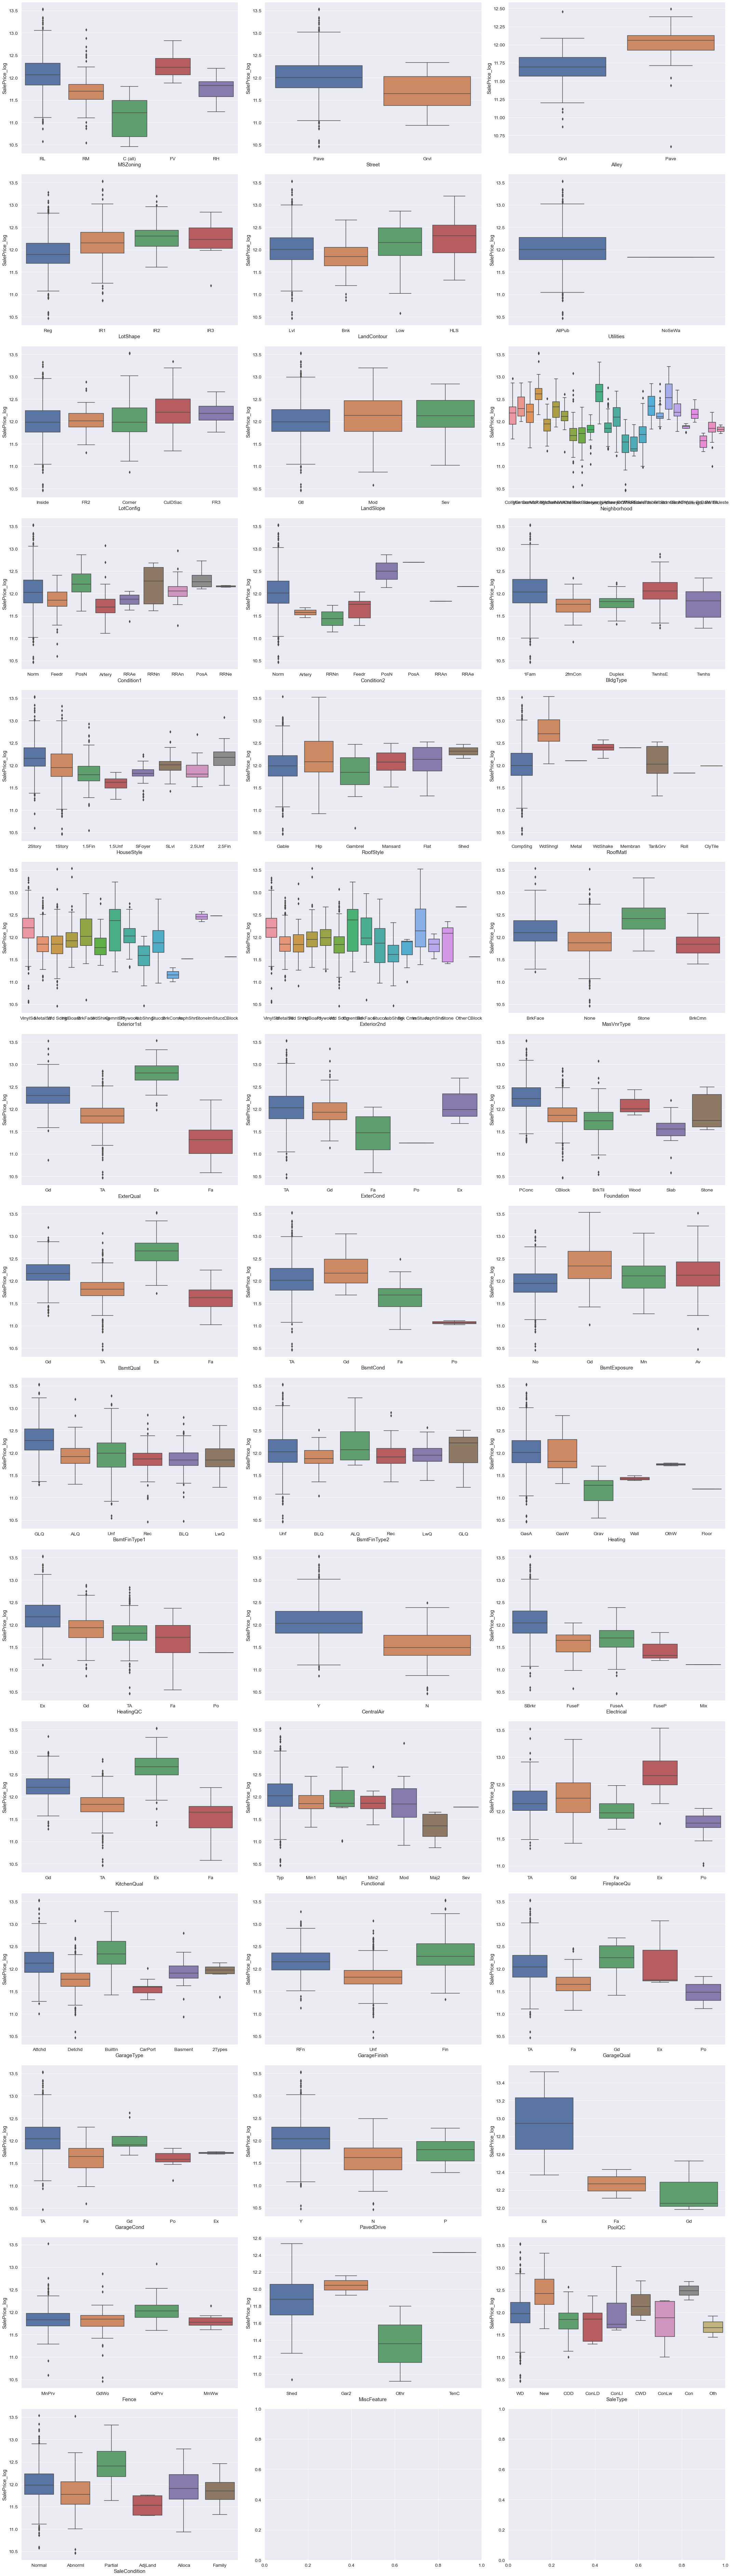

In [192]:
cat_feats = list(quali_variables)
nr_rows = 15
nr_cols =3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*10,nr_rows*7))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(cat_feats):
            sns.boxplot(x=cat_feats[i], y="SalePrice_log", data=df_train, ax = axs[r][c])
    
plt.tight_layout()    


#### From the boxplot, many qualitative variables dont show a strong correlations with the SalePrice_log,  I visually identify the following variables which show relative stronger impact and after converting them to numerical, we can run another correaltion test to examine.
MSZoning,Neighborhood,BdgType,HouseStyle,MasVnrType,ExterQual,Foundation,BsmtQual,HeatingQC,CentralAir,KitchenQual,GarageType,SaleType

In [193]:
### list of selected qualitative variable:

quali_variables_strong=['MSZoning','Neighborhood','BldgType','ExterQual','Foundation',
                        'HeatingQC','CentralAir','KitchenQual','SaleType']



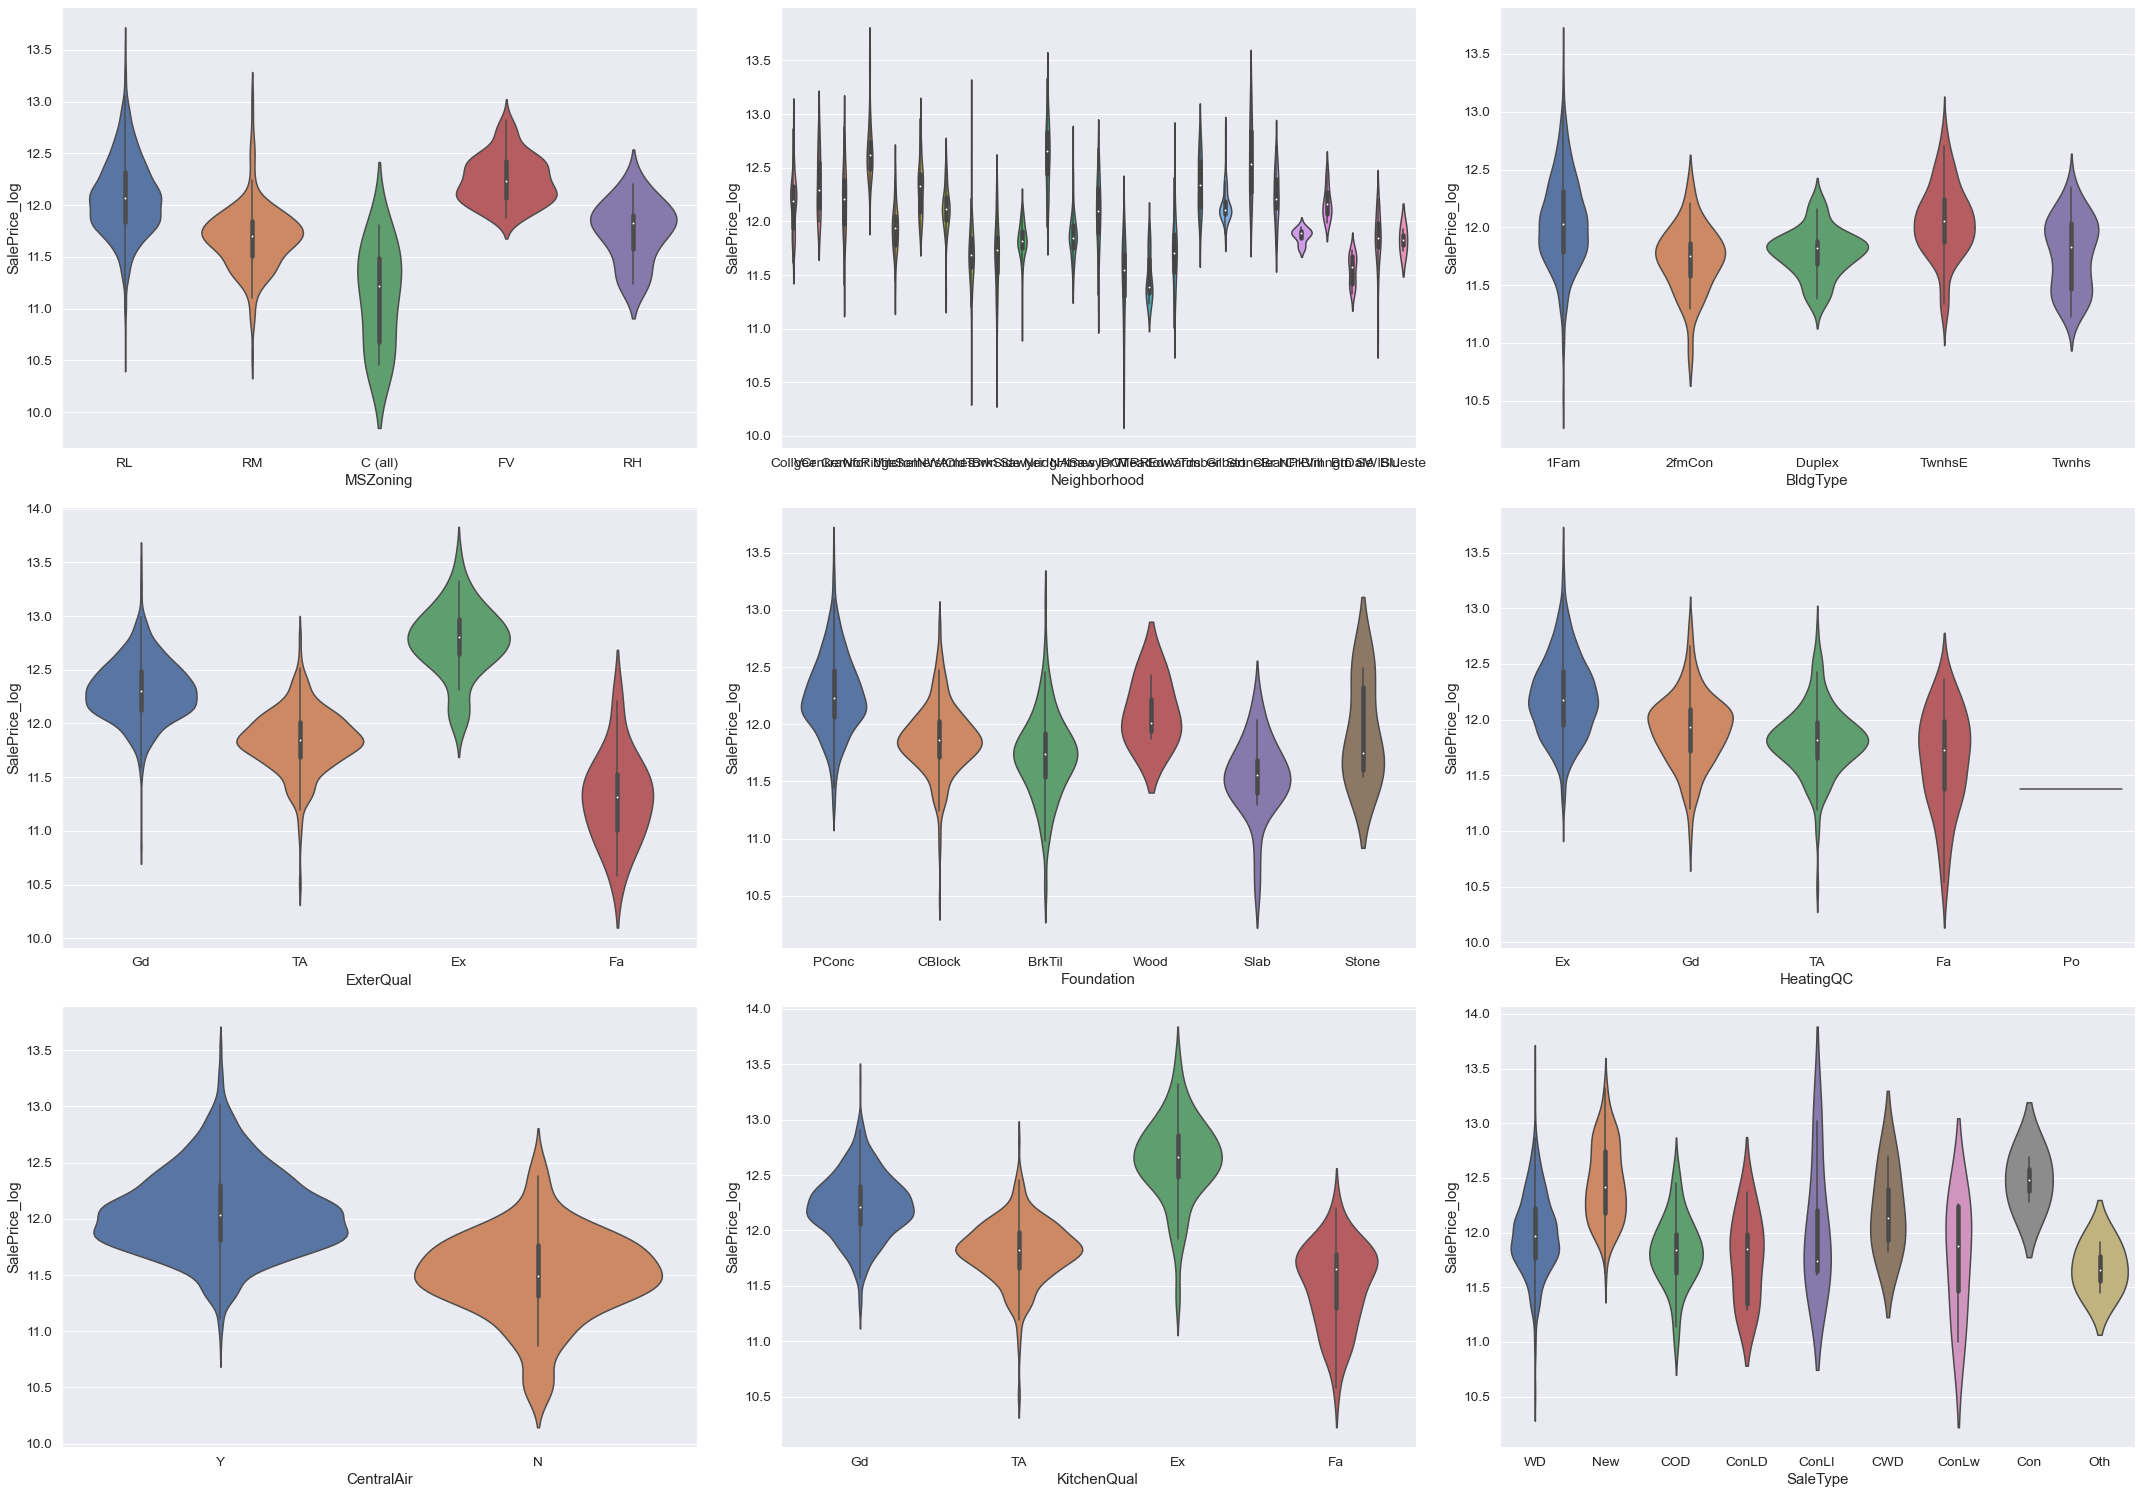

In [194]:
#### this is the selected qualitative variables box plot against saleprice-log

cat_feats = list(quali_variables_strong)
nr_rows = 3
nr_cols =3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*10,nr_rows*7))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(cat_feats):
            sns.violinplot(x=cat_feats[i], y="SalePrice_log", data=df_train, ax = axs[r][c])
    
plt.tight_layout()    


#### Pandas offers a convenient function called get_dummies to get one-hot encodings.

In [195]:
df_train_c=pd.get_dummies(df_train[quali_variables_strong])

In [196]:
df_train[quali_variables_strong].isnull().sum()  ### check missing data in df_train

MSZoning        0
Neighborhood    0
BldgType        0
ExterQual       0
Foundation      0
HeatingQC       0
CentralAir      0
KitchenQual     0
SaleType        0
dtype: int64

In [699]:
#df_test = pd.read_csv(CURR_DIR+"\\HW5\\test.csv")

In [197]:

##df_test.fillna(df_test.mode(), inplace=True)
df_test[quali_variables_strong].isnull().sum()

MSZoning        4
Neighborhood    0
BldgType        0
ExterQual       0
Foundation      0
HeatingQC       0
CentralAir      0
KitchenQual     1
SaleType        1
dtype: int64

In [198]:

df_test.groupby(['MSZoning'])['MSZoning'].count()


MSZoning
C (all)      15
FV           74
RH           10
RL         1114
RM          242
Name: MSZoning, dtype: int64

In [199]:
# Replace Nan with most frequent value
df_test.MSZoning.fillna(value='RL',inplace=True)

In [200]:
df_test.MSZoning.isnull().sum()

0

In [201]:
df_test.groupby(['KitchenQual'])['KitchenQual'].count()


KitchenQual
Ex    105
Fa     31
Gd    565
TA    757
Name: KitchenQual, dtype: int64

In [202]:
df_test.KitchenQual.fillna(value='TA',inplace=True)

In [203]:
df_test[quali_variables_strong].isnull().sum()

MSZoning        0
Neighborhood    0
BldgType        0
ExterQual       0
Foundation      0
HeatingQC       0
CentralAir      0
KitchenQual     0
SaleType        1
dtype: int64

In [204]:
df_test.groupby(['SaleType'])['SaleType'].count()

SaleType
COD        44
CWD         8
Con         3
ConLD      17
ConLI       4
ConLw       3
New       117
Oth         4
WD       1258
Name: SaleType, dtype: int64

In [205]:
df_test[df_test['SaleType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1029,2490,20,RL,85.0,13770,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2007,NaN,Normal


In [206]:
df_test.SaleType.fillna(value='WD',inplace=True)

In [207]:
df_test.SaleType.fillna(value='WD',inplace=True)
df_test.KitchenQual.fillna(value='TA',inplace=True)
df_test.MSZoning.fillna(value='RL',inplace=True)

In [208]:
df_test[quali_variables_strong].isnull().sum()

MSZoning        0
Neighborhood    0
BldgType        0
ExterQual       0
Foundation      0
HeatingQC       0
CentralAir      0
KitchenQual     0
SaleType        0
dtype: int64

#### Prepare the final dataframe for model df _train df_test dataset

In [209]:
## get the onehot encoded for qualative variables and 


df_test_c=pd.get_dummies(df_test[quali_variables_strong])



#### This is the categorical features in test

In [210]:
df_test_c

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,KitchenQual_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1455,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1456,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1457,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [211]:
cols_test = ['OverallQual', 'GrLivArea_log', 'GarageCars', 'TotalBsmtSF' ,'FullBath',
        'YearBuilt','YearRemodAdd','MasVnrArea','LotArea_log']

<AxesSubplot:xlabel='GrLivArea_log', ylabel='Density'>

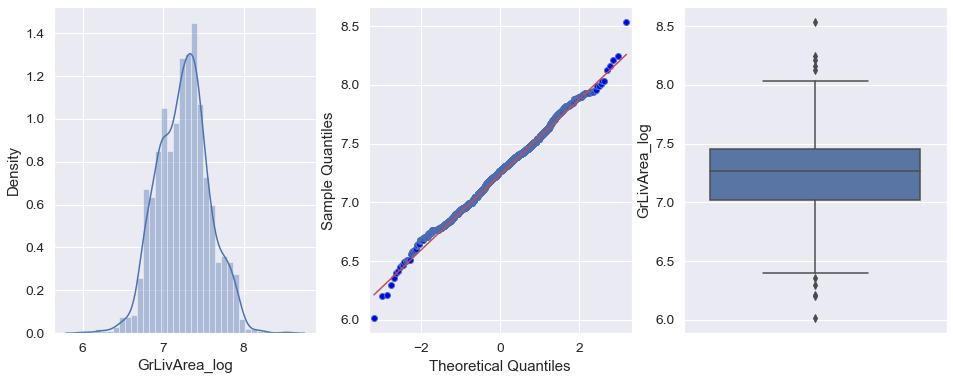

In [212]:
df_test['GrLivArea_log'] = np.log1p(df_test['GrLivArea'])

#create histogram, boxplot , Q-Q plot to check the data normality 
fig,ax=plt.subplots(1,3,figsize=(16,6))
fig = sm.qqplot(df_test['GrLivArea_log'],line='q',ax=ax[1])
sns.boxplot(y="GrLivArea_log",data=df_test,ax=ax[2])
sns.distplot(df_test['GrLivArea_log'],ax=ax[0])

<AxesSubplot:xlabel='LotArea_log', ylabel='Density'>

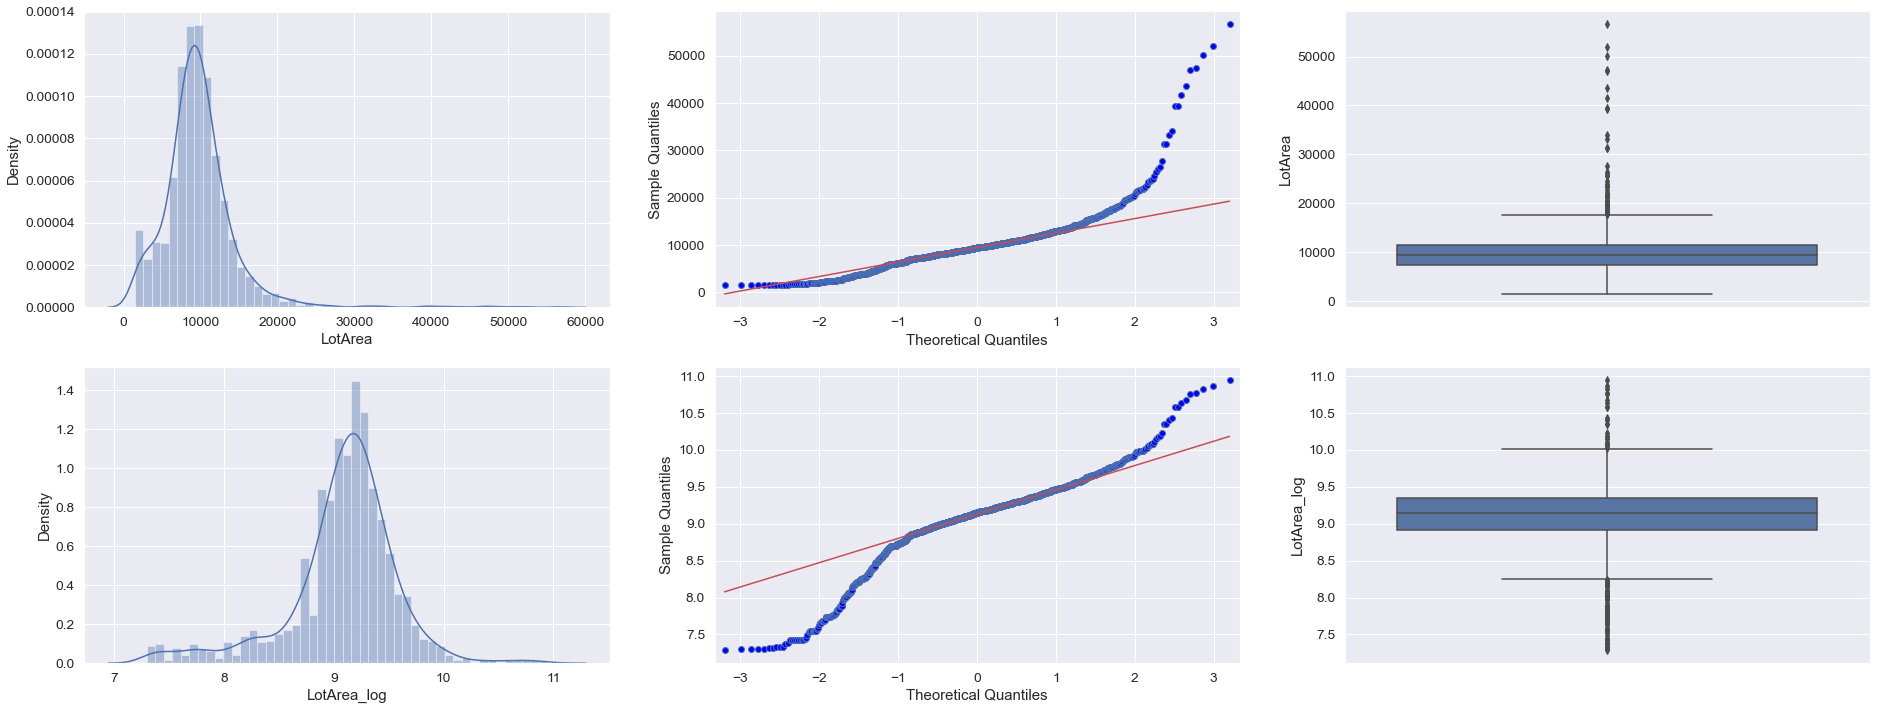

In [213]:
#create histogram, boxplot , Q-Q plot to check the data normality for LotArea
fig,ax=plt.subplots(2,3,figsize=(32,12))
fig = sm.qqplot(df_test['LotArea'],line='q',ax=ax[0,1])
sns.boxplot(y="LotArea",data=df_test,ax=ax[0,2])
sns.distplot(df_test['LotArea'],ax=ax[0,0])
df_test['LotArea_log'] = np.log1p(df_test['LotArea'])

fig = sm.qqplot(df_test['LotArea_log'],line='q',ax=ax[1,1])
sns.boxplot(y="LotArea_log",data=df_test,ax=ax[1,2])
sns.distplot(df_test['LotArea_log'],ax=ax[1,0])

In [214]:
df_test_ml=df_test[cols_test]

In [215]:
df_test_ml

,OverallQual,GrLivArea_log,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,LotArea_log
0,5,6.799056,1.0,882.0,1,1961,1961,0.0,9.360741
1,6,7.192934,1.0,1329.0,1,1958,1958,108.0,9.565775
2,5,7.396335,2.0,928.0,2,1997,1998,0.0,9.534668
3,6,7.380879,2.0,926.0,2,1998,1998,20.0,9.208238
4,8,7.155396,2.0,1280.0,2,1992,1992,0.0,8.518392
...,...,...,...,...,...,...,...,...,...
1454,4,6.996681,0.0,546.0,1,1970,1970,0.0,7.568896
1455,4,6.996681,1.0,546.0,1,1970,1970,0.0,7.546974
1456,5,7.110696,2.0,1224.0,1,1960,1996,0.0,9.903538
1457,5,6.878326,0.0,912.0,1,1992,1992,0.0,9.253591


In [216]:
y = df_train['SalePrice_log']

df_train_ml = df_train_ml[cols_test].copy()

#### Standardize the quantative features:

In [723]:
df_train_ml_sc

,OverallQual,GrLivArea_log,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,LotArea_log
0,-0.071376,-0.381509,0.311842,0.466024,0.790180,0.157460,-0.428941,-0.573915,0.113283
1,0.651797,0.659831,0.311842,-0.313599,0.790180,0.985508,0.830752,0.323329,0.419817
2,0.651797,0.541677,1.650010,-0.687453,-1.025367,-1.862979,-0.719640,-0.573915,0.103191
3,1.374970,1.282341,1.650010,0.199311,0.790180,0.952386,0.733853,1.364575,0.878045
4,-0.794548,-0.152871,0.311842,-0.596269,-1.025367,0.720533,0.491604,-0.573915,0.858291
...,...,...,...,...,...,...,...,...,...
1454,-0.071376,0.416858,0.311842,-0.238372,0.790180,0.919264,0.733853,-0.573915,-0.259236
1455,-0.071376,1.106737,0.311842,1.104312,0.790180,0.223704,0.152456,0.085172,0.725094
1456,0.651797,1.470102,-1.026327,0.215268,0.790180,-1.001808,1.024551,-0.573915,-0.002450
1457,-0.794548,-0.853962,-1.026327,0.046578,-1.025367,-0.703711,0.540054,-0.573915,0.136695


#### Creating dataset for ML Model

In [220]:
df_train_f=pd.concat([df_train_ml,df_train_c],axis=1)
list(df_train_f.columns)

Index(['OverallQual', 'GrLivArea_log', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'LotArea_log',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'BldgType_1Fam',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'ExterQu

In [223]:
## data from train.csv and we can split this data to another train/test set.

df_train_f=pd.concat([df_train_ml,df_train_c],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_f,
                                                    df_train['SalePrice_log'], 
                                                    test_size=0.3, 
                                                    random_state=101)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train),columns=list(df_train_f.columns))
X_test_sc= pd.DataFrame(sc.transform(X_test),columns=list(df_train_f.columns))

#y_train_sc = pd.DataFrame(sc.fit_transform(X_train))
#y_test_sc= pd.DataFrame(sc.transform(y_test))


X = X_train
y = y_train

X_t=X_test
y_t=y_test





In [726]:

df_test_f_sc

,OverallQual,GrLivArea_log,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,LotArea_log,MSZoning_C (all),...,KitchenQual_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,-0.794548,-1.408268,-1.026327,-0.400224,-1.025367,-0.339369,-1.155687,-0.573915,0.482691,0,...,1,0,0,0,0,0,0,0,0,1
1,-0.071376,-0.226412,-1.026327,0.618757,-1.025367,-0.438735,-1.301037,0.024248,0.878993,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.794548,0.383905,0.311842,-0.295362,0.790180,0.853020,0.636953,-0.573915,0.818868,0,...,1,0,0,0,0,0,0,0,0,1
3,-0.071376,0.337527,0.311842,-0.299921,0.790180,0.886142,0.636953,-0.463144,0.187922,0,...,0,0,0,0,0,0,0,0,0,1
4,1.374970,-0.339047,0.311842,0.507057,0.790180,0.687411,0.346255,-0.573915,-1.145458,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.517721,-0.815281,-2.364495,-1.166169,-1.025367,-0.041272,-0.719640,-0.573915,-2.980711,0,...,1,0,0,0,0,0,0,0,0,1
1455,-1.517721,-0.815281,-1.026327,-1.166169,-1.025367,-0.041272,-0.719640,-0.573915,-3.023082,0,...,1,0,0,0,0,0,0,0,0,1
1456,-0.794548,-0.473173,0.311842,0.379399,-1.025367,-0.372491,0.540054,-0.573915,1.531844,0,...,1,0,0,0,0,0,0,0,0,1
1457,-0.794548,-1.170412,-2.364495,-0.331836,-1.025367,0.687411,0.346255,-0.573915,0.275584,0,...,1,0,0,0,0,0,0,0,0,1


In [224]:
df_train_f=pd.concat([df_train_ml,df_train_c],axis=1)
df_train_f

,OverallQual,GrLivArea_log,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,LotArea_log,MSZoning_C (all),...,KitchenQual_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,7,7.444833,2,856,2,2003,2003,196.0,9.042040,0,...,0,0,0,0,0,0,0,0,0,1
1,6,7.141245,2,1262,2,1976,1976,0.0,9.169623,0,...,1,0,0,0,0,0,0,0,0,1
2,7,7.488294,2,920,2,2001,2002,162.0,9.328212,0,...,0,0,0,0,0,0,0,0,0,1
3,7,7.448916,3,756,1,1915,1970,0.0,9.164401,0,...,0,0,0,0,0,0,0,0,0,1
4,8,7.695758,3,1145,2,2000,2000,350.0,9.565284,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,7.407318,2,953,2,1999,2000,0.0,8.976894,0,...,1,0,0,0,0,0,0,0,0,1
1456,6,7.637234,2,1542,2,1978,1988,119.0,9.486152,0,...,1,0,0,0,0,0,0,0,0,1
1457,7,7.758333,1,1152,2,1941,2006,0.0,9.109746,0,...,0,0,0,0,0,0,0,0,0,1
1458,5,6.983790,1,1078,1,1950,1996,0.0,9.181735,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_train_f

In [682]:
for x in list(df_test_f.columns):
    if x not in list(df_train_f.columns):
        print(x)

MSZoning_None
KitchenQual_None
SaleType_None


**Model tuning and selection with GridSearchCV**

In [225]:
from sklearn.model_selection import GridSearchCV
score_calc = 'neg_mean_squared_error'

In [226]:
# setting the number of cross validations used in the Model part 
nr_cv = 10

# switch for using log values for SalePrice and features     
use_logvals = 1    
# target used for correlation 
target = 'SalePrice_Log'
    
# only columns with correlation above this threshold value  
# are used for the ML Regressors in Part 3
min_val_corr = 0.4    
    
# switch for dropping columns that are similar to others already used and show a high correlation to these     
drop_similar = 1

In [227]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [250]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_squared_error
from sklearn import metrics

### Linear Regression

In [228]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_linear = GridSearchCV(linreg, parameters, cv=nr_cv, verbose=1 , scoring = score_calc)
grid_linear.fit(X, y)

sc_linear = get_best_score(grid_linear)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.137009931528443
{'copy_X': True, 'fit_intercept': False, 'normalize': True}
LinearRegression(fit_intercept=False, normalize=True)


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.0s finished


MAE: 0.10782266177574824
MSE: 0.026609536805548742
RMSE: 0.16312429863618952
r2: 0.8417006720035443


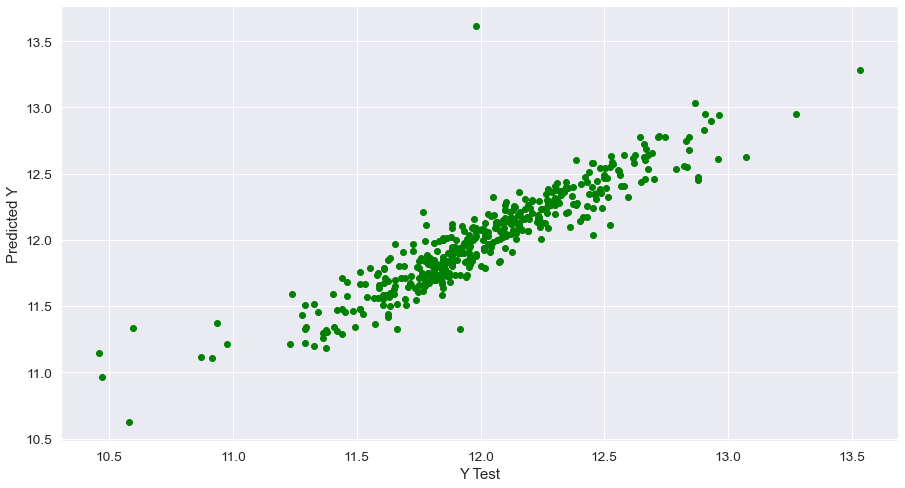

In [279]:
pred_lr = grid_linear.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, pred_lr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))
print('r2:', r2_score(y_test, pred_lr))
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred_lr, c= 'green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()






### Ridge

In [231]:
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameters, cv=nr_cv, verbose=1, scoring = score_calc)
grid_ridge.fit(X, y)

sc_ridge = get_best_score(grid_ridge)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.1365546148034786
{'alpha': 1, 'normalize': False, 'tol': 1e-06}
Ridge(alpha=1, tol=1e-06)


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    2.6s finished


MAE: 0.10623497347706805
MSE: 0.026069795889510194
RMSE: 0.16146143777853025
r2: 0.8449115743550379


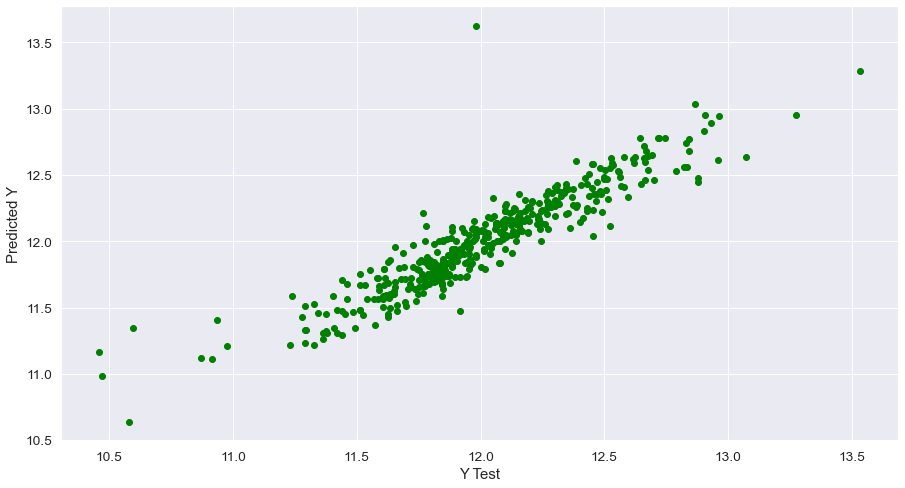

In [278]:
pred_ridge= grid_ridge.predict(X_test)


print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print('r2:', r2_score(y_test, pred_ridge))
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred_ridge, c= 'green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()







In [740]:
pred_ridge_all

array([11.68082859, 11.95026124, 12.04740921, ..., 11.99603091,
       11.69131297, 12.30675907])

### Lasso

In [232]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_lasso = GridSearchCV(lasso, parameters, cv=nr_cv, verbose=1, scoring = score_calc)
grid_lasso.fit(X, y)

sc_lasso = get_best_score(grid_lasso)

pred_lasso = grid_lasso.predict(X_test)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.13851905075325135
{'alpha': 0.001, 'normalize': False, 'tol': 0.001}
Lasso(alpha=0.001, tol=0.001)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    3.9s finished


MAE: 0.10451472061485001
MSE: 0.02767378974949857
RMSE: 0.16635441006928123
r2: 0.8353694634944816


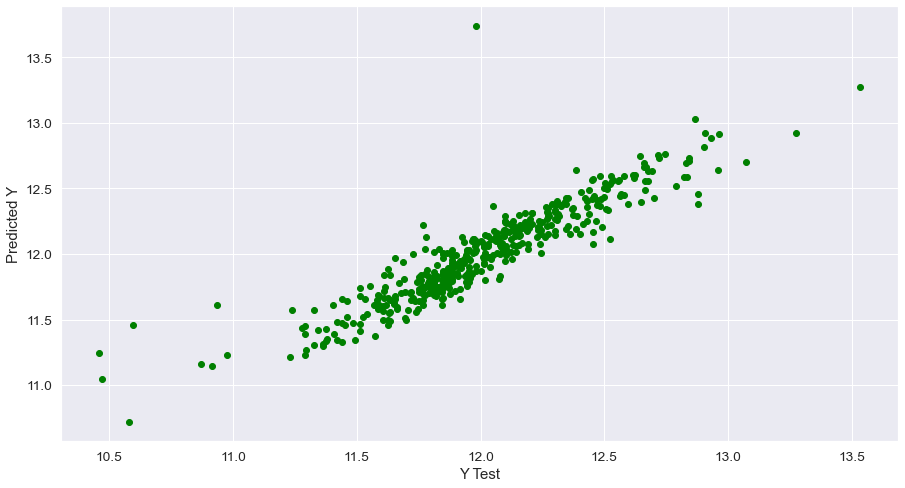

In [277]:
pred_lasso= grid_lasso.predict(X_test)


print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print('r2:', r2_score(y_test, pred_lasso))
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred_lasso, c= 'green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


### Decision Tree

In [233]:
from sklearn.tree import DecisionTreeRegressor

param_grid = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30],
                'presort': [False,True] , 'random_state': [5] }
            
grid_dtree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=nr_cv, refit=True, verbose=1, scoring = score_calc)
grid_dtree.fit(X, y)

sc_dtree = get_best_score(grid_dtree)

pred_dtree = grid_dtree.predict(X_test)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.1963803036722774
{'max_depth': 10, 'max_features': 11, 'max_leaf_nodes': None, 'min_samples_split': 20, 'presort': False, 'random_state': 5}
DecisionTreeRegressor(max_depth=10, max_features=11, min_samples_split=20,
                      presort=False, random_state=5)


[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed:   23.5s finished


MAE: 0.1604519533496628
MSE: 0.05074026915296005
RMSE: 0.22525600802855414
r2: 0.6981476766030004


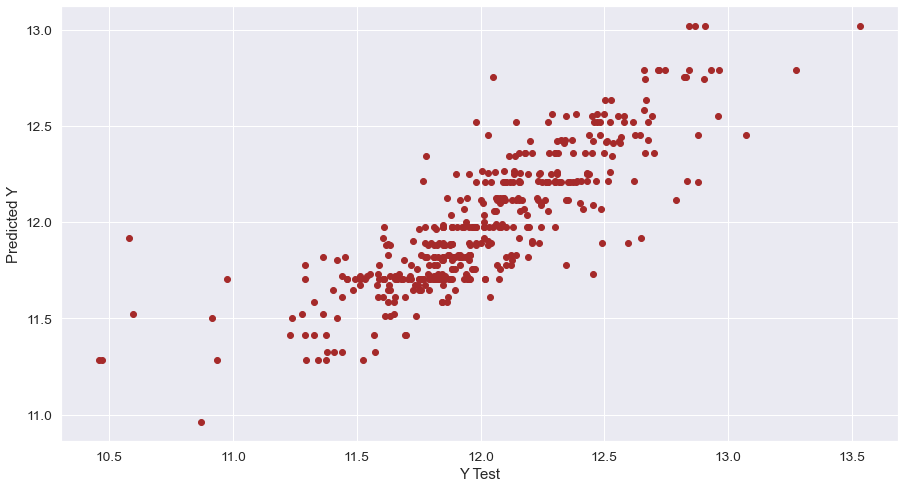

In [276]:

pred_dtree = grid_dtree.predict(X_test)


print('MAE:', metrics.mean_absolute_error(y_test, pred_dtree))
print('MSE:', metrics.mean_squared_error(y_test, pred_dtree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_dtree)))
print('r2:', r2_score(y_test, pred_dtree))
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred_dtree, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


### Random Forest

In [234]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100], 'random_state': [5] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=nr_cv, refit=True, verbose=1, scoring = score_calc)
grid_rf.fit(X, y)

sc_rf = get_best_score(grid_rf)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   30.4s finished


0.15343599995332036
{'min_samples_split': 10, 'n_estimators': 100, 'random_state': 5}
RandomForestRegressor(min_samples_split=10, random_state=5)


In [273]:
sc_rf

0.15343599995332036

MAE: 0.10848552540605633
MSE: 0.026470329419426106
RMSE: 0.1626970479739141
r2: 0.842528812524606


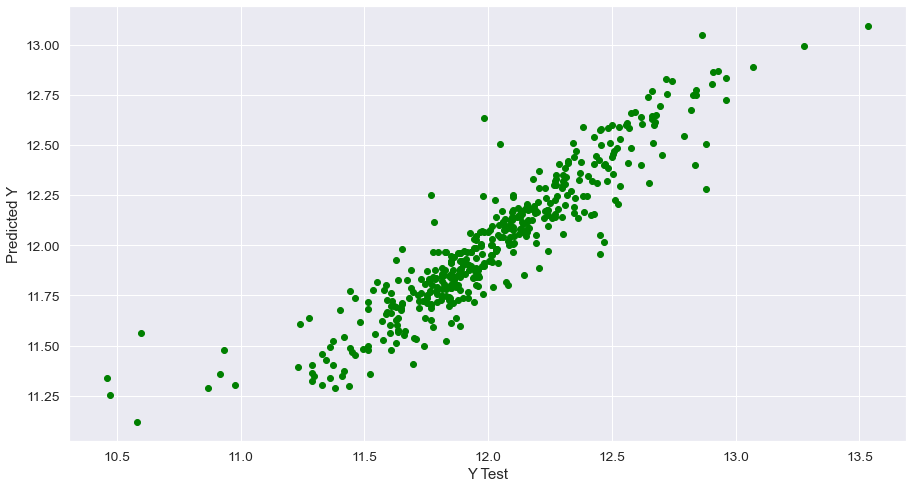

In [275]:
pred_rf= grid_rf.predict(X_test)


print('MAE:', metrics.mean_absolute_error(y_test, pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, pred_rf))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))
print('r2:', r2_score(y_test, pred_rf))
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred_rf, c= 'green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### AdaBoost

In [236]:
import sklearn as sk
from sklearn.ensemble import AdaBoostRegressor
param_grid = {
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }


abr = AdaBoostRegressor(base_estimator =DecisionTreeRegressor())

# run grid search
grid_abr = GridSearchCV(abr, param_grid, cv=nr_cv, refit=True, verbose=1, scoring = score_calc)
#grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_abr.fit(X, y)

sc_abr = get_best_score(grid_abr)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.2146622369918367
{'base_estimator__splitter': 'best', 'n_estimators': 1}
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=1)


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished


MAE: 0.15906828347241028
MSE: 0.04860104004022336
RMSE: 0.22045643569699516
r2: 0.7108738857606907


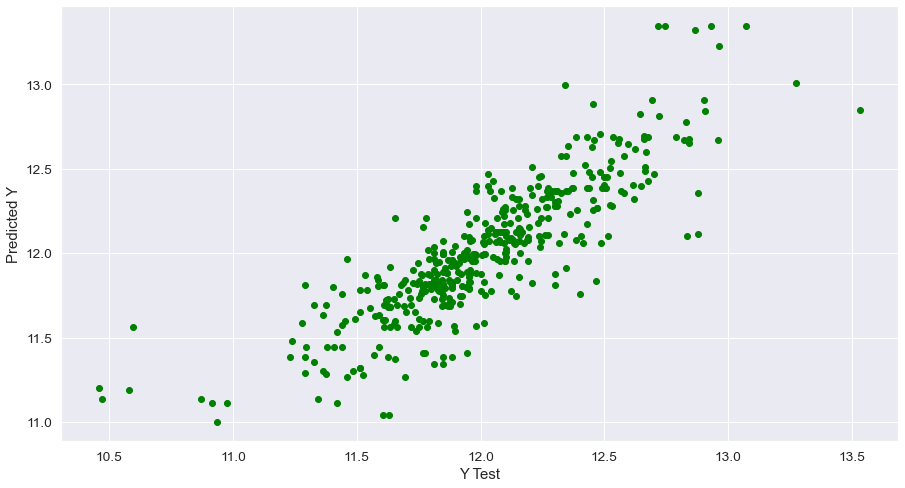

In [274]:
pred_abr= grid_abr.predict(X_test)


print('MAE:', metrics.mean_absolute_error(y_test, pred_abr))
print('MSE:', metrics.mean_squared_error(y_test, pred_abr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred_abr)))
print('r2:', r2_score(y_test, pred_abr))
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred_abr, c= 'green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [285]:
import xgboost as xgb

xgbr = xgb.XGBRegressor()
params = {'learning_rate': [0.10,0.14,0.15,0.16, 0.2], 'max_depth': [1,2,3,5] }

xgbr_reg = GridSearchCV(xgbr, params, cv = 10, n_jobs =1)
xgbr_reg.fit(X_train,y_train)

print("Best params:{}".format(xgbr_reg.best_params_))

best_x = xgbr_reg.best_estimator_
y_train_pred_x = best_x.predict(X_train)
y_val_pred_x = best_x.predict(X_test)

Best params:{'learning_rate': 0.1, 'max_depth': 3}


MAE: 0.1038892631154155
MSE: 0.02246430357681961
RMSE: 0.14988096469138304
r2: 0.8663605388509661


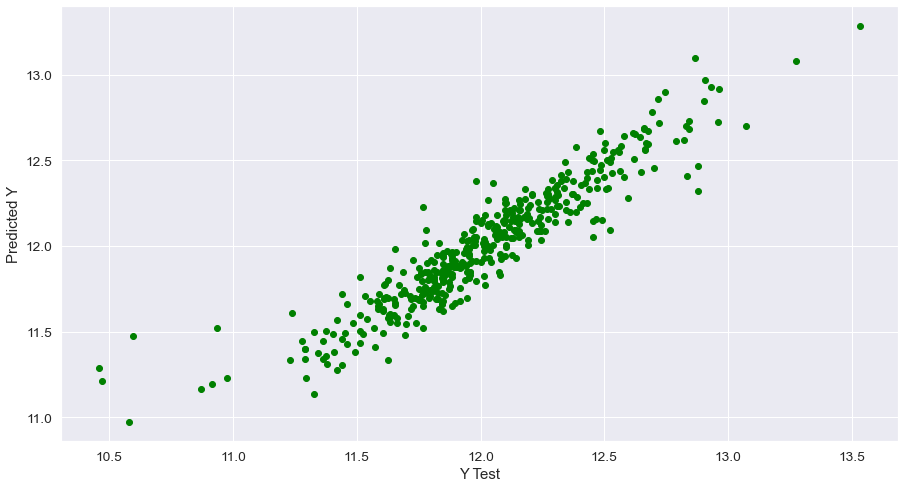

In [286]:
pred_xgb= xgbr_reg.predict(X_test)


print('MAE:', metrics.mean_absolute_error(y_test, pred_xgb))
print('MSE:', metrics.mean_squared_error(y_test, pred_xgb))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred_xgb)))
print('r2:', r2_score(y_test, pred_xgb))
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred_xgb, c= 'green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [298]:
pred_xgb= xgbr_reg.predict(X_test)

In [296]:
X_test

,OverallQual,GrLivArea_log,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,LotArea_log,MSZoning_C (all),...,KitchenQual_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1054,8,7.595890,2,1065,2,2002,2002,210.000000,9.338558,0,...,0,0,0,0,0,0,0,0,0,1
361,5,7.317212,1,883,1,1940,1982,0.000000,9.120963,0,...,1,0,0,0,0,0,0,0,0,1
1282,5,6.947937,2,1040,2,1977,2008,0.000000,9.082621,0,...,0,0,0,0,0,0,0,0,0,1
161,9,7.889459,3,1572,2,2003,2004,664.000000,9.524348,0,...,0,0,0,0,0,0,0,0,0,1
515,10,7.611348,3,2006,2,2009,2009,305.000000,9.410911,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,6,7.670895,2,1444,2,1958,2006,472.000000,11.976666,0,...,0,0,0,0,0,0,0,0,0,1
467,5,7.405496,1,728,1,1942,1995,224.000000,9.157045,0,...,0,0,0,0,0,0,0,0,0,1
650,7,7.418181,2,813,2,2007,2007,103.685262,9.002824,0,...,0,0,0,0,0,0,0,0,0,1
48,4,7.281386,0,736,2,1920,2008,0.000000,8.402231,0,...,1,0,0,0,0,0,0,1,0,0


## Submission

In [301]:




df_test_f=pd.concat([df_test_ml,df_test_c],axis=1)
pred_xgb_SalePrice_log= xgbr_reg.predict(df_test_f)

predict_price=np.exp(pred_xgb_SalePrice_log)

In [303]:
predict_price

array([118131.98, 156737.1 , 171654.48, ..., 158324.28, 119596.31,
       229793.95], dtype=float32)

In [307]:
my_submission=pd.DataFrame({'Id':df_test.Id,'SalePrice':predict_price})

In [308]:
my_submission

,Id,SalePrice
0,1461,118131.976562
1,1462,156737.093750
2,1463,171654.484375
3,1464,179997.187500
4,1465,205079.609375
...,...,...
1454,2915,82954.765625
1455,2916,89076.781250
1456,2917,158324.281250
1457,2918,119596.312500


In [309]:
my_submission.to_csv('XGboost SalePrice.csv',index=False)